
# <font size="+1">**Table de matières**</font>




<font size="+3"><span style='color:#26467a'> **P4 - Anticipez les besoins en consommation de bâtiments** </span></font>


![SeattleLogo](img/Seattle_logo.png)


Ce Notebook s'intègre dans le projet d'analyse de la consommation et des émissions des bâtiments non destinés à l’habitation dans la ville de Seattle.

Il comprend l'**évaluation de l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions de CO2 des bâtiments non destinés à l'habitation**.

Le jeu de données uilisé correspond à la sauvegarde du jeu de données nettoyé et transformé lors de la première phase de nettoyage.<br> (*SanchezPellicer_Raquel_1_notebook_exploratoire_012023.ipynb*)




[Librairies utilisées](#CHARGEMENT_LIBRAIRIES)<br>

[Fontcions utilisées dans ce notebook](#FONCTIONS_UTILISÉES)<br>

---

[**Description du jeux de données**](#fichier_données)

[**Pre-processing**](#pre_processing)
 * [Stratification des données](#data_stratification)
 * [Découpage données entrainement et test](#trainSet_testSet)  
 * [Matrice X et vecteur y](#MatriceX_vecteury)   
 * [Encodage des variables catégorielles](#scaling_variables_categorielles)  
 * [Feature scaling](#feature_scaling)<br>

[**Test de differents algorithmes de Machine Learning**](#Test_algo_ML)
 * [Baseline : Approches de régression naïves](#baseline)
 * [Modèles NON lineaires](#Model_NON_linear)
   * [SVR - Support Vector Regressor kernel non linéaire](#SVR)
   * [K-Neighbors Regressor](#KNR)
   * [Random Forest Regressor](#random_Forest)
   * [Ada Boost Regressor](#adaBoost)
   * [Gradient Boosting Regressor](#Gradient_Boosting)  
   * [Light Gradient Boosting Machine](#LightGBM)<br>
 * [Bilan des algorithmes testés](#bilan_algorithmes)<br>


[**Optimisation des algorithmes**](#opti_algo)
 * [Idéntification hyperparamètres](#id_hyperparamètres)
   * [Hyperparamètres Gradient Boosting Regressor](#Gradient_Boosting_hyperparam)
   * [Hyperparamètres Random Forest Regressor](#RF_hyperparam)
   * [Hyperparamètres Light Gradient Boosting Machine](#LightGBM_hyperparam)<br>
 * [Sélection du meilleur algorithme pour la estimation desEmissions de CO2 ](#selec_algo_co2)


[**Prédictions émissions CO2 du modèle final**](#pred_final_co2)
 * [Importance des variables pour la estimation des emissions de CO2](#features_importance_CO2)
 * [Erreurs de prédiction ](#pred_errors_Co2)
   * [Erreur maximale et minimale sur le jeu de test](#min_max_error)
   * [Erreur de prédiction des emissions de CO2 supérieur à celui du 99% des prédictions restantes](#erreur_sup99)
   * [Erreurs de prédiction de consomation d'énergie est supérieur à celui du 95% des prédictions restantes](#erreur_sup95)
   * [Erreurs de prédiction de consomation d'énergie est inférieur à celui du 95% des prédictions restantes](#erreur_inf5)
   * [Erreurs de prédiction de consomation d'énergie est inférieur à celui du 99% des prédictions restantes](#erreur_inf1)<br>
 * [Importance des variables associées aux erreurs plus/moins importants](#errors_feature_importance)
 
<br>

---

---

[**Prédiction des émissions de CO2 avec "ENERGY STAR Score"**](#predic_CO2_energy_score)
  * [Pre-processing](#pre_processing_EnergyStar)
    * [Stratification des données](#data_stratification_EnergyStar)
    * [Découpage données entrainement et test](#trainSet_testSet_EnergyStar)  
    * [Encodage des variables catégorielles](#scaling_variables_categorielles_EnergyStar)  
    * [Feature scaling](#feature_scaling_EnergyStar)<br>

 * [Prémier entraînement des algorithmes, dataset avec Energy Star Score](#1er_train_ML_EnergyStar_EnergyStar)
   * [Baseline : Approches de régression naïves](#baseline_EnergyStar)
   * [Modèles NON lineaires](#Model_NON_linear_EnergyStar)
     * [Random Forest Regressor](#random_Forest_EnergyStar)
     * [Gradient Boosting Regressor](#Gradient_Boosting_EnergyStar)  
     * [Light Gradient Boosting Machine](#LightGBM_EnergyStar)<br>
   * [Bilan des algorithmes testés](#bilan_algorithmes_EnergyStar)

 * [Optimisation des algorithmes](#opti_algo_EnergyStar)
   * [Hyperparamètres Gradient Boosting Regressor](#Gradient_Boosting_hyperparam_EnergyStar)
   * [Hyperparamètres Random Forest Regressor](#RF_hyperparam_EnergyStar)
   * [Hyperparamètres Light Gradient Boosting Machine](#LightGBM_hyperparam_EnergyStar)
   * [Sélection du meilleur algorithme pour la estimation desEmissions de CO2 ](#selec_algo_EnergyStar)<br>

 * [Prédictions émissions CO2, avec Energy Star Score, du modèle final](#pred_final_EnergyStar)
   * [Importance des variables pour la estimation des emissions de CO2, avec Energy Star Score](#features_importance_CO2)
   * [Erreurs de prédiction ](#pred_errors_Co2)
     * [Erreur maximale et minimale sur le jeu de test, des émissions de CO2 avec Energy Star Score](#min_max_error_EnergyStar)
     * [Erreur de prédiction des emissions de CO2 supérieur à celui du 95% des prédictions restantes, des émissions de CO2 avec Energy Star Score](#erreur_sup95_EnergyStar)
     * [Erreur de prédiction des emissions de CO2 inférieur à celui du 95% des prédictions restantes, des émissions de CO2 avec Energy Star Score](#erreur_inf5_EnergyStar)<br>
   * [Importance des variables associées aux erreurs plus/moins importants, des émissions de CO2 avec Energy Star Score](#errors_feature_importance_EnergyStar)

<br>

---
---

[**Évaluation de l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions**](#eval_energy_score)



---
---





<a id='CHARGEMENT_LIBRAIRIES'></a>

---

---

<font size="+1"> **CHARGEMENT DES LIBRAIRIES** </font>

---

In [1]:

#-----------------------------
#Actuallisation des packages
#-----------------------------
#!pip install --upgrade pip


#General libraries
import os
import glob
import pandas as pd
import numpy as np
import random
import csv
from pprint import pprint
from functools import reduce

#Data preprocessing
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from category_encoders import TargetEncoder

# Modélisation
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn import tree
import lightgbm
from lightgbm import LGBMRegressor
import time

# Feature Importance
import shap
shap.initjs()
import lime
from lime import lime_tabular

# Data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
import plotly.express as px


# Warnings
import warnings
from warnings import simplefilter
#warnings.filterwarnings(action='once')
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ValueError)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)


'''
#-------------------------------------------------------------
#Vérification des numéros des versions des packages installés
#-------------------------------------------------------------
'''
print('Version des librairies utilisées : \n')


print('Pandas        : ' + pd.__version__)
print('NumPy         : ' + np.version.full_version)
print('Csv           : ' + csv.__version__ + '\n')

print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__+ '\n')

print('Sklearn        : ' + sklearn.__version__)
print('LightGBM        : ' + lightgbm.__version__)
print('Shap       : ' + shap.__version__+ '\n')


import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)


/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/raquelsp/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Version des librairies utilisées : 

Pandas        : 1.5.2
NumPy         : 1.23.5
Csv           : 1.0

Matplotlib    : 3.3.4
Seaborn       : 0.11.1

Sklearn        : 1.2.0
LightGBM        : 3.3.5
Shap       : 0.41.0

Lancé le      : 2023-02-14T09:37:50.200618



<a id='FONCTIONS_UTILISÉES'></a>


<br>


---
---

<font size="+1"> **FONCTIONS UTILISÉES DANS CE NOTEBOOK** </font>

---


In [2]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour la description des fichiers de données 
#-----------------------------------------------------------------------------

def compl_info (df):
    nb_row = df.index.size
    nb_col = df.columns.size
    Types = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    Null = pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}) 
    PercCount = pd.DataFrame(100-100*(df.isna().sum())/nb_row).T.rename(index={0:'Pourcentage remplissage'}) 
    infor = pd.concat ([Types,Null,PercCount], axis =0)
    return infor

In [3]:

#--------------------------------------------------------------
# ---Création des 'arrays of indices' pour les folds stratifiés
#--------------------------------------------------------------


def stratified_cv(X_train,strat_arg):
    
    """
    Iterable yielding (train, test) splits as arrays of indices
    
    ----------
    Paramètres
    ----------
    X_train : X_train_set à découper, obligatoire
    strat_arg : variable cible, obligatoire
    """
      
    split_cv = model_selection.StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=randomN)
    stratified_cv = []
    
    for i, (train_index_cv, test_index_cv) in enumerate(split_cv.split(X_train, strat_arg)):
        stratified_cv = zip(train_index_cv, test_index_cv)
    

In [4]:

# ----------------------------------------------
# -- Modèles : entraînement et cross-validation
# ----------------------------------------------

def process_regression(model_reg, 
                       X_train, X_test, 
                       y_train, y_test,
                       cv_folds,
                       df_resultats, 
                       titre, scaler, event, 
                       show_table=True, 
                       show_compar=True, 
                       show_errors=True,
                       show_evaluation = True):
    
    """
    Lance un modele de régression et effectue cross-validation
    
    ----------
    Paramètres
    ----------
    model_reg : modèle de régression, obligatoire.
    X_train : train set matrice X, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    df_resultats : dataframe sauvegardant les traces, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    scaler : scaler utilisé lors du pré-processing, obligatoire.
    event : étape de développement, d'entraînement ou de réglage de l'algorithme, obligatoire.
    show_table : booleen affiche le tableau de résultat, facultatif.
    show_compar : booleen affiche le graphique comparant y_test/y_pres, facultatif.
    show_errors : booleen affichage du graphique des erreurs, facultatif.
    show_evaluation : booleen affichage de la synthèse de l'evaluation des performances du modèle avec les paramètres actuels, facultatif
    
    -------
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle
    model_reg.fit(X_train, y_train)
    # Prédictions avec le test set
    y_pred = model_reg.predict(X_test)

    # Top fin d'exécution
    time_end = time.time()

    # Calcul des métriques
    errors_abs = np.abs(y_test - y_pred)
    mae = round(metrics.mean_absolute_error(y_test, y_pred),0)
    mse = round(metrics.mean_squared_error(y_test, y_pred),1)
    rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),1)
    r2 = round(metrics.r2_score(y_test, y_pred),5)
    time_execution = round(time_end - time_start,5)

    
    # cross validation
    scoring = ['r2', 'neg_mean_squared_error']
    scores = model_selection.cross_validate(model_reg, X_train, y_train,\
                                            cv= cv_folds ,\
                                            scoring=scoring, return_train_score=True)

  
    # Sauvegarde des performances  
    df_resultats = pd.concat([df_resultats,(pd.DataFrame({
        'Modèle': [titre],
        'Scaler' : [scaler],
        'Durée': [time_execution],
        'R2': [r2],
        'MAE': [mae],
        'MSE': [mse], 
        'RMSE': [rmse],
        'CV Train R2': [scores['train_r2'].mean()],                                      
        #'CV Train R2 std': [scores['train_r2'].std()], 
        'CV Test R2': [scores['test_r2'].mean()], 
        #'CV Test R2 std': [scores['test_r2'].std()],
        'CV Train MSE': [-(scores['train_neg_mean_squared_error'].mean())],
        'CV Test MSE': [-(scores['test_neg_mean_squared_error'].mean())]
         }))], axis =0)


    if show_table:
        display(df_resultats.loc[df_resultats["Modèle"] == titre].style.hide(axis="index"))

    if show_compar:
        plt.figure(figsize=(5,5))
        sns.jointplot(y_test, y_pred, kind='reg')
        plt.xlabel('y_test')
        plt.ylabel('y_predicted')
        plt.suptitle(t='Tests /Predictions pour : ' + str(titre),\
                       fontsize=12, alpha=0.75, weight='bold', ha='center')
        plt.tight_layout() 
        plt.show()

    if show_errors:
        df_res = pd.DataFrame({'true': y_test, 'pred': y_pred})
        df_res = df_res.sort_values('true')
        plt.figure(figsize=(5,5))
        plt.plot(df_res['pred'].values, label='pred')
        plt.plot(df_res['true'].values, label='true')
        plt.xlabel('Test set')
        plt.ylabel("Emissions de CO2")
        plt.suptitle(t='Erreurs pour : ' + str(titre),\
                     fontsize=12, alpha=0.75, weight='bold', ha='center')
        plt.legend()
        plt.tight_layout() 
        plt.show()
    
    if show_evaluation :
        print('\033[1m'+' Performance du modèle : ' + str(event) +"\033[0m")
        print('\033[1m'+' Erreur moy: {:0.2f}'.format(np.mean(errors_abs))+"\033[0m")
        print('\033[1m'+' R2: {:0.4f} '.format(r2)+"\033[0m")
        
    return df_resultats, y_pred


In [5]:

# --- Evaluation de la recherche aléatoire de paramètres

def evaluate(model, X_test, y_test, event):
    
    """
    Évalue la performande d'un modèle pour une configuration des hyperparamètres donnée
    
    ----------
    Paramètres
    ----------
    model : modèle de régression, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    event : étape de développement, d'entraînement ou de réglage de l'algorithme, obligatoire
    
    -------
    Returns
    -------
    Erreur moyen et cofficient R2 pour la configuration donnée
    """
    
    y_pred = model.predict(X_test)
    errors_abs = np.abs(y_test - y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    print('\033[1m'+' Performance du modèle : ' + event +"\033[0m")
    print('\033[1m'+' Erreur moy: {:0.2f}'.format(np.mean(errors_abs))+"\033[0m")
    print('\033[1m'+' R2: {:0.4f} '.format(r2)+"\033[0m")
      
    return r2



In [6]:

#----------------------------------------------------------------
# ---TABLEAU LISSIBLE À PARTIR DES RÉSULTATS DU grid.cv_results_
#----------------------------------------------------------------

def resultize(grid , df_resultats) :
    
    """Crée un tableau lisible avec les resultats du grid.cv_results_
    
    ----------
    Paramètres
    ----------
    grid :  obligatoire
    df_resultats : dataframe sauvegardant resultats, obligatoire
    
    -------
    Returns
    -------
    df_resultats : Résumé ordoné des resultats du grid.cv_results_
    """
    
    df_resultats = pd.DataFrame(grid.cv_results_)
    cols = [i for i in df_resultats.columns if "split" not in i]
    df_resultats = df_resultats[cols]
    df_resultats = df_resultats.sort_values("rank_test_score")
    
    return df_resultats


In [7]:

def plot_learning_curve(model, title, X_train, y_train, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Affiche la  learning curve pour je jeu de données de test et d'entraînement
    
    Parameters
    ----------
    model : object qui implemente les méthodes "fit" and "predict", obligatorie
    title : string, titre du graphique, obligatoire
    X : Training_set, obligatoire
    y : labels du training_set, obligatoire 
    cv : strategie de 'split' pour la validation croissée
        Entrées possibles.
          - None, cross-validation par default fold,
          - integer, nombre de folds
          - Object, generateur pour la cross-validation
          - 'Iterable' qui genére les index pour séparer les set de train et test
    """
    plt.figure()
    plt.title(title)

    plt.xlabel("Training exemples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                            X_train, y_train, 
                                                            cv=cv, n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()




<a id='fichier_données'></a>

# <span style='background:#26467a'><span style='color:white'>**Description du jeux de données** </span></span>



---
---

<font size="+1">**Aperçu du jeu de données**</font>


In [8]:
# Définir le dossier qui contient les fichiers avec les données du projet

P4_cleaned = '/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_cleaned'

os.chdir(P4_cleaned)

# Nombre et nom des fichiers csv
allFilesCsv = glob.glob('*.csv')   

print("L'information sur les variablese est contenue dans: "+str(len(allFilesCsv))+ " fichiers.\n")
print("Les fichiers contenant l'information sur les variables sont: "+str(allFilesCsv))


L'information sur les variablese est contenue dans: 2 fichiers.

Les fichiers contenant l'information sur les variables sont: ['BEB_2016.csv', 'index_BEB_2016.csv']


In [9]:

#-----------------------------------
# Chargement du  fichier des données
#-----------------------------------
data_BEB_2016 = pd.read_csv('BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')

#-------------------------------------------------------------------------------------------------
# Réduction du dataset aux variables nécessaires pour la modélisation des Emissions de CO2
#-------------------------------------------------------------------------------------------------
data_BEB_2016 = data_BEB_2016[data_BEB_2016['ENERGYSTARScore'].notna()].reset_index(drop=True)
model_Emi_BEB_2016 = data_BEB_2016.drop(columns=['SiteEnergyUseWN(kBtu)', 'ENERGYSTARScore'])

#-----------------------------------
# Taille du  fichier des données
#-----------------------------------
print("Le jeux de données contient " + str(model_Emi_BEB_2016.shape[0]) + " lignes et " + str(model_Emi_BEB_2016.shape[1]) + " colonnes.\n")

#-------------------------------
# Aperçu données Open Food Facts
#-------------------------------
pd.options.display.max_columns = None
model_Emi_BEB_2016.head(3)


Le jeux de données contient 1016 lignes et 54 colonnes.



Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN  47.61220 -122.33799                  1              12   
1     DOWNTOWN  47.61317 -122.33393                  1              11   
2     DOWNTOWN  47.61393 -122.33810                  1              41   

   PropertyGFAParking  PropertyGFABuilding(s)  TotalGHGEmissions  SteamUse%  \
0                 0.0                 88434.0             249.98  27.730164   
1             15064.0                 88502.0             295.86   0.000000   
2            196718.0                759392.0            2089.28  29.711310   

   Electricity%  NaturalGas%  PropertyAge  CouncilDistrict_1  \
0     54.605997    17.663840           89                  0   
1     38.660907    61.339093           20                  0   
2     68.230746     2.057944           47                  0   

   CouncilDistrict_2  CouncilDistrict_3  CouncilDistrict_4  CouncilDistrict_5  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   

   CouncilDistrict_6  CouncilDistrict_7  Auto_Dealership  Care  Data  \
0                  0                  1              0.0   0.0   0.0   
1                  0                  1              0.0   0.0   0.0   
2                  0                  1              0.0   0.0   0.0   

   Distribution  Education  Fire_Station  Gym  Gym_Pool  Health     Hotel  \
0           0.0        0.0           0.0  0.0       0.0     0.0   88434.0   
1           0.0        0.0           0.0  0.0       0.0     0.0   83880.0   
2           0.0        0.0           0.0  0.0       0.0     0.0  956110.0   

   Hotel_Pool  Industrial  Laborator  Lodging  Movie  Museum  Nightclub  \
0         0.0         0.0        0.0      0.0    0.0     0.0        0.0   
1         0.0         0.0        0.0      0.0    0.0     0.0        0.0   
2         0.0         0.0        0.0      0.0    0.0     0.0        0.0   

   Non-Refrigerated_Warehouse  O_Recreation  O_Recreation_Pool  O_Science  \
0                         0.0           0.0                0.0        0.0   
1                         0.0           0.0                0.0        0.0   
2                         0.0           0.0                0.0        0.0   

   O_Utilit  Offices  Other  Parking  Performing  Pool  Prison  \
0       0.0      0.0    0.0      0.0         0.0   0.0     0.0   
1       0.0      0.0    0.0  15064.0         0.0   0.0     0.0   
2       0.0      0.0    0.0      0.0         0.0   0.0     0.0   

   Refrigerated_Warehouse  Repair  Restaurants  Self_Storage  Services  \
0                     0.0     0.0          0.0           0.0       0.0   
1                     0.0     0.0       4622.0           0.0       0.0   
2                     0.0     0.0          0.0           0.0       0.0   

   Shopping  Worship_Facilit  
0       0.0              0.0  
1       0.0              0.0  
2       0.0              0.0

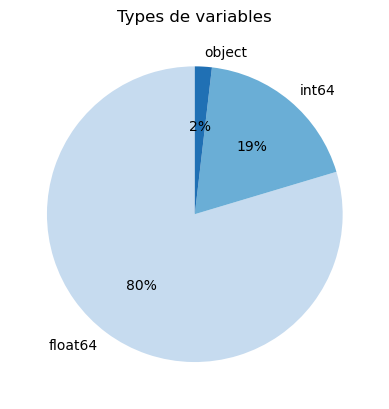

In [10]:
#Type de données
info_model_Emi_BEB_2016 = compl_info(model_Emi_BEB_2016).T.sort_values("Pourcentage remplissage").reset_index()
info_model_Emi_BEB_2016 = info_model_Emi_BEB_2016.rename(columns={'index':'Variable'})

dTypes = info_model_Emi_BEB_2016['Type'].value_counts()
blues3 = sns.color_palette(palette="Blues", n_colors =3)

plt.pie(dTypes.values.tolist(), labels=['float64','int64', 'object'], colors = blues3, autopct='%.0f%%', startangle=90)
plt.title("Types de variables")
plt.show()

<a id='pre_processing'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Pre-processing** </span></span>


<a id='data_stratification'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Stratification des données </span>

In [11]:

# Creation d'une variable catégorielle fondée dans les quantiles pour faciliter l'échantillonage stratifié

model_Emi_BEB_2016['TotalGHGEmissions_cat'] = pd.cut(model_Emi_BEB_2016['TotalGHGEmissions'],
                                                            bins=[model_Emi_BEB_2016['TotalGHGEmissions'].min(), np.quantile(model_Emi_BEB_2016['TotalGHGEmissions'], 0.25),
                                                                  np.quantile(model_Emi_BEB_2016['TotalGHGEmissions'], 0.5),
                                                                  np.quantile(model_Emi_BEB_2016['TotalGHGEmissions'], 0.75), np.inf],
                                                            labels=['0-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-inf'], include_lowest=True)


<a id=' trainSet_testSet'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Découpage données entrainement et test </span>

In [12]:

# Choix de la valeur de base pour le générateur aléatoire
randomN = 84

# Découpage des données train/test avec stratification
split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=randomN)

for train_index, test_index in split.split(model_Emi_BEB_2016, model_Emi_BEB_2016['TotalGHGEmissions_cat']):
    strat_train_set = model_Emi_BEB_2016.loc[train_index]
    strat_test_set = model_Emi_BEB_2016.loc[test_index]


<a id=' MatriceX_vecteury'></a>

---

## <span style='background:#2a679a'><span style='color:white'>  Matrice X et vecteur y </span>

**Matrice X**

In [13]:

# Matrice X
X_train = strat_train_set.drop(columns=['TotalGHGEmissions', 'TotalGHGEmissions_cat'], axis=1)
print("X_train " +str(X_train.shape))

X_test = strat_test_set.drop(columns=['TotalGHGEmissions', 'TotalGHGEmissions_cat'], axis=1)
print("X_test " +str(X_test.shape) +"\n")


X_train (812, 53)
X_test (204, 53)



**Vecteur y**

In [14]:

# Variable cible, emissions = 'TotalGHGEmissions' 
y_train = strat_train_set['TotalGHGEmissions'].copy()
print("y_train " +str(y_train.shape))

y_test = strat_test_set['TotalGHGEmissions'].copy()
print("y_test " +str(y_test.shape) +"\n")


y_train (812,)
y_test (204,)



<a id='scaling_variables_categorielles'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Encodage des variables catégorielles </span>

In [15]:

# Variables qualitatives
vari_quali = ['Neighborhood']

# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données 
X_train[vari_quali] = target_encoder.fit_transform(X_train[vari_quali], y_train)
X_test[vari_quali] = target_encoder.transform(X_test[vari_quali])


<a id='feature_scaling'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Feature scaling </span>

In [16]:

vari_quanti = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()


**RobustScaler**

In [17]:

#RobustScaler, moins impacté par les outliers (n'asume pas normalité)
scaler_RobS = RobustScaler()

X_train_RS = X_train.copy()
X_test_RS = X_test.copy()

# Scaling
X_train_RS[vari_quanti] = scaler_RobS.fit_transform(X_train_RS[vari_quanti])
X_test_RS[vari_quanti] = scaler_RobS.transform(X_test_RS[vari_quanti])


<a id='Test_algo_ML'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Test de differents algorithmes de Machine Learning** </span></span>


<a id='baseline'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Baseline : Approches de régression naïves </span>

In [18]:

# Création d'un dataframe pour enregistrer les résultats de la baseline
df_baseline = pd.DataFrame(dtype='object')


In [19]:

# RobustScaler
# DummyRegressor mean 
# -----------------------------------------------------------------------
dummy_mean = DummyRegressor(strategy='mean')
df_baseline, y_pred = process_regression(dummy_mean, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_baseline,'DummyRegressorMean', 'RobustScaler','1er entraînement',
                                                 True, False, False, False)


In [20]:

# Création d'un dataframe pour enregistrer les résultats de l'entraînement des modèles
df_resultats_algo = pd.DataFrame(dtype='object')


<a id='Model_NON_linear'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Modèles NON lineaires </span>

<a id='random_Forest'></a>

### <span style='background:#358ab7'><span style='color:white'>**Random Forest Regressor**</span></span>

In [21]:

# Régression Random Forest
# ------------------------
model_RF = RandomForestRegressor(random_state=randomN)


<Figure size 500x500 with 0 Axes>

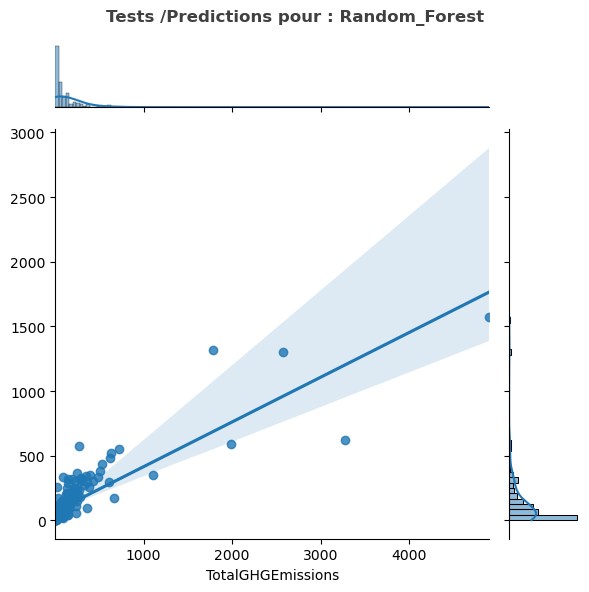

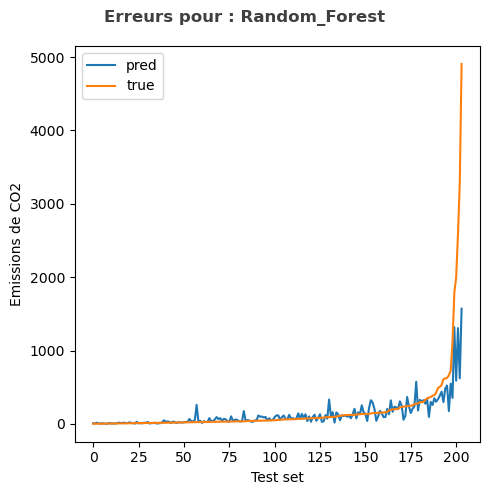

In [22]:

# Robust Scaler
# -------------
df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Random_Forest','RobustScaler','1er entraînement',
                                                  True, True, True, False)


<a id='LightGBM'></a>

### <span style='background:#358ab7'><span style='color:white'>**Light Gradient Boosting Machine**</span></span>

In [23]:

# Régression  LightGBM
# ---------------------
model_lgbm = LGBMRegressor(random_state=randomN)


<Figure size 500x500 with 0 Axes>

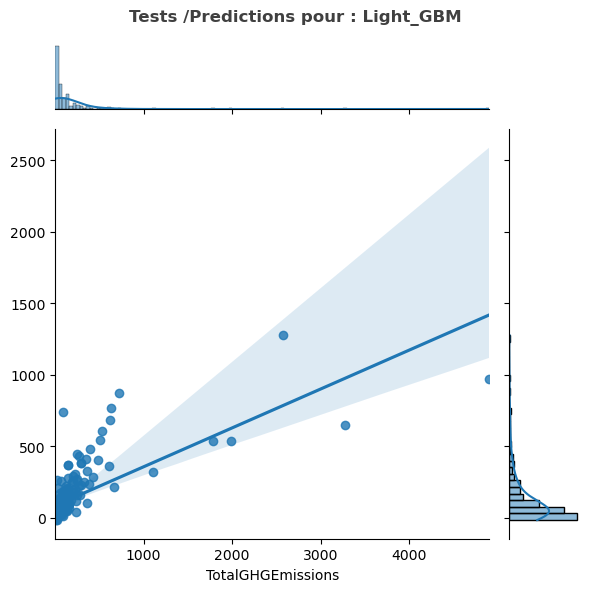

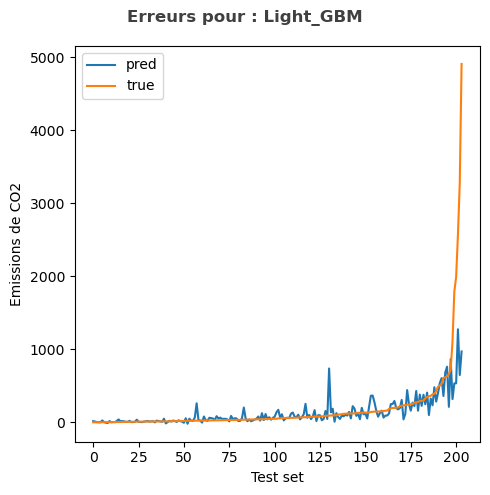

In [24]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Light_GBM','RobustScaler','1er entraînement',
                                                True, True, True, False)


<a id='Gradient_Boosting'></a>

### <span style='background:#358ab7'><span style='color:white'>**Gradient Boosting Regressor**</span></span>

In [25]:

# Régression Gradient Boosting
# ----------------------------
model_GBR = GradientBoostingRegressor(random_state=randomN, verbose=False)


<Figure size 500x500 with 0 Axes>

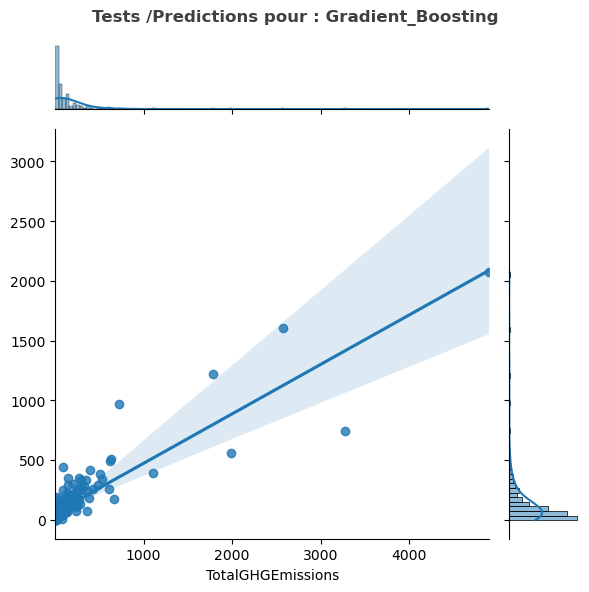

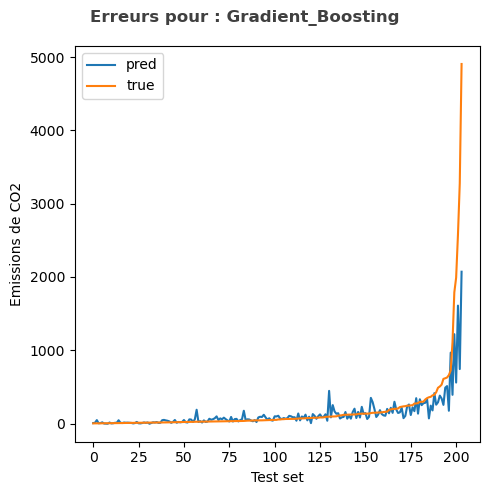

In [26]:

# Robust Scaler
# --------------
df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'Gradient_Boosting','RobustScaler','1er entraînement',
                                                 True, True, True, False)


<a id='bilan_algorithmes'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Bilan des algorithmes testés </span>

**Tableau de résultats des scores par modèle**

In [27]:

bilan_algo = df_resultats_algo.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_algo.style.hide(axis="index")


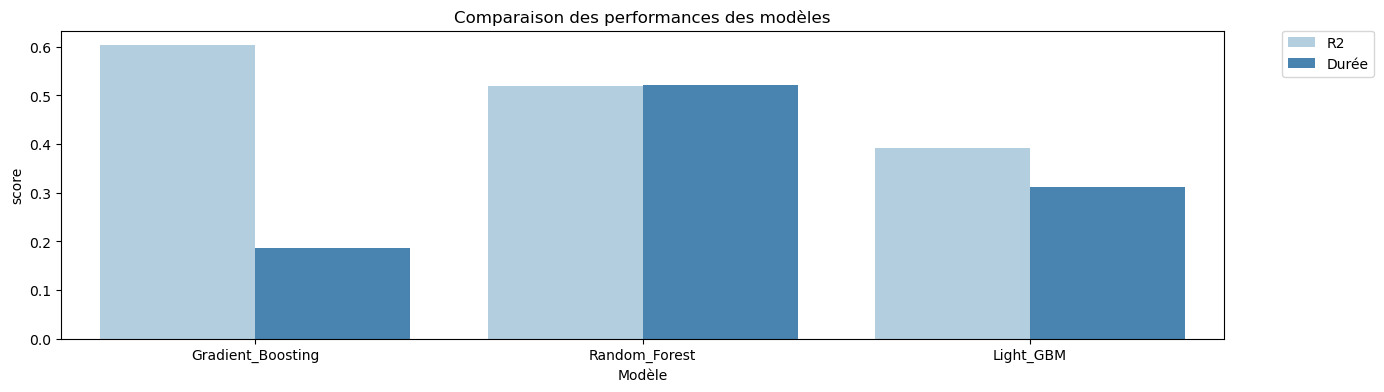

In [28]:

# Comparaison des algorithmes 
df_compar = bilan_algo.loc[((bilan_algo["Modèle"] == 'Gradient_Boosting') &(bilan_algo["Scaler"] == 'RobustScaler')) | 
                           ((bilan_algo["Modèle"] == 'Random_Forest') &(bilan_algo["Scaler"] == 'RobustScaler'))  |
                           ((bilan_algo["Modèle"] == 'Light_GBM') &(bilan_algo["Scaler"] == 'RobustScaler')) ]


comparaison_score_melt1 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(15,4))
sns.barplot(x=comparaison_score_melt1['Modèle'],
            y=comparaison_score_melt1['score'], hue=comparaison_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


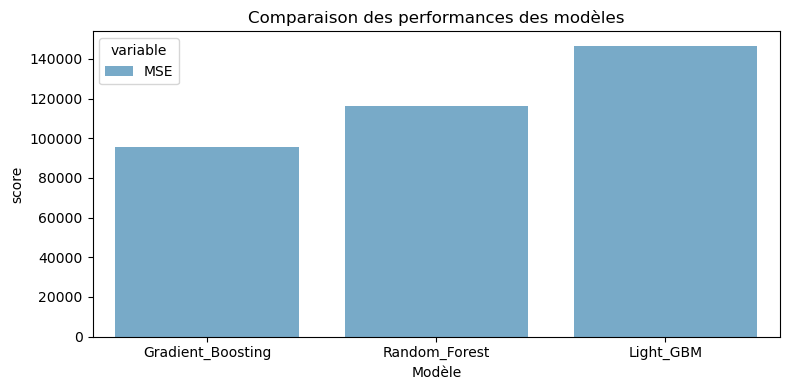

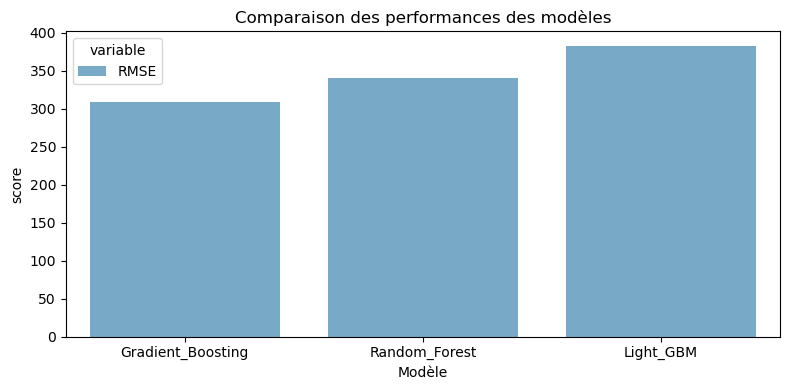

In [29]:

# Comparaison des algorithmes 

comparaison_score_melt2 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_score_melt3 = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(8,4))
sns.barplot(x=comparaison_score_melt2['Modèle'],
            y=comparaison_score_melt2['score'], hue=comparaison_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=comparaison_score_melt3['Modèle'],
            y=comparaison_score_melt3['score'], hue=comparaison_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()


<a id='opti_algo'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Optimisation algorithmes** </span></span>


In [30]:
# Création d'un dataframe pour enregistrer les résultats 
df_resultats_opti = pd.DataFrame(dtype='object')

<a id='id_hyperparamètres'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Idéntification hyperparamètres </span>

In [31]:

# Création d'un dataframe pour enregistrer les résultats de l'optimissation des algorithmes 
df_resultats_opti = pd.DataFrame(dtype='object')


<a id='Gradient_Boosting_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Gradient Boosting Regressor**</span></span>

In [32]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'Gradient_Boosting']


Modèle        Scaler    Durée       R2   MAE      MSE   RMSE  \
0  Gradient_Boosting  RobustScaler  0.18648  0.60288  88.0  95775.3  309.5   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.970891    0.697482   1748.908359  19678.408997


Les résultats de l'algorithme 'Gradient Boost Regressor' ne varient pas beaucoup en fonction de la mèthode de mise à l'échelle des données.
On decide d'optimiser les paramètres avec la mise à l'échelle avec 'RobustScaler'


In [33]:

df_resultats_algo, y_pred = process_regression(model_GBR, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 87.53
 R2: 0.6029 


In [34]:

# Paramètres de base d'un algorithme "Gradient Boosting Regressor"
print("Les paramètres par défaut pour l'algorithme 'Gradient Boosting Regressor':")
pprint(model_GBR.get_params())


Les paramètres par défaut pour l'algorithme 'Gradient Boosting Regressor':
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 84,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [35]:

# Séléction des valeurs des hyperparamètres à tester
GBR_params = {'n_estimators' : [50, 100, 150],
              'learning_rate' : [0.05,0.1, 0.2],
              'max_depth' : [3, 7, None],
              'min_samples_split' : [2, 4]}


In [36]:

#Cross validation des combinaisons des valeurs des differents paramètres

GBR_grid = model_selection.GridSearchCV(model_GBR, GBR_params,
                                        cv =stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

GBR_grid.fit(X_train_RS, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(error_score='raise',
             estimator=GradientBoostingRegressor(random_state=84,
                                                 verbose=False),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 7, None], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

In [37]:

#
best_GBR_params = GBR_grid.best_params_
best_GBR_params


{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [38]:

# Création d'un dataframe pour enregistrer les résultats 
GBR_params_results = pd.DataFrame(dtype='object')

resultize(GBR_grid,GBR_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
38       0.221437      0.000807         0.001542        0.000044   
37       0.149575      0.001343         0.001508        0.000077   

   param_learning_rate param_max_depth param_n_estimators  \
38                 0.2               3                150   
37                 0.2               3                100   

                                               params  mean_test_score  \
38  {'learning_rate': 0.2, 'max_depth': 3, 'min_sa...         0.724368   
37  {'learning_rate': 0.2, 'max_depth': 3, 'min_sa...         0.721770   

    std_test_score  rank_test_score  mean_train_score  std_train_score  
38        0.097256                1          0.993027         0.001016  
37        0.098731                2          0.986510         0.001369

<Figure size 500x500 with 0 Axes>

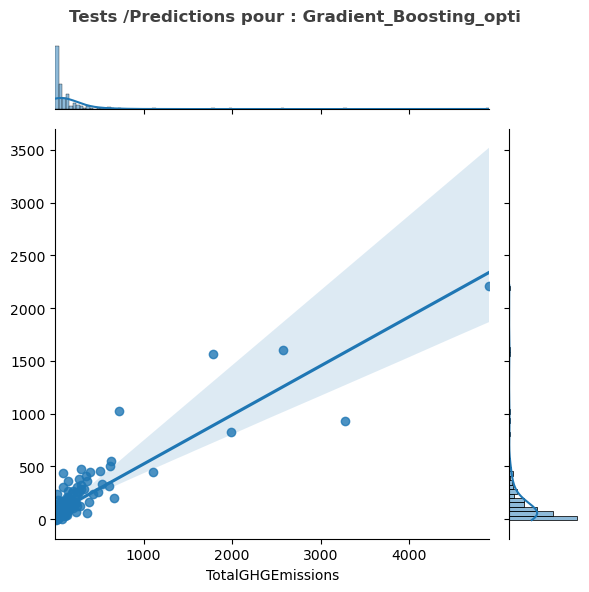

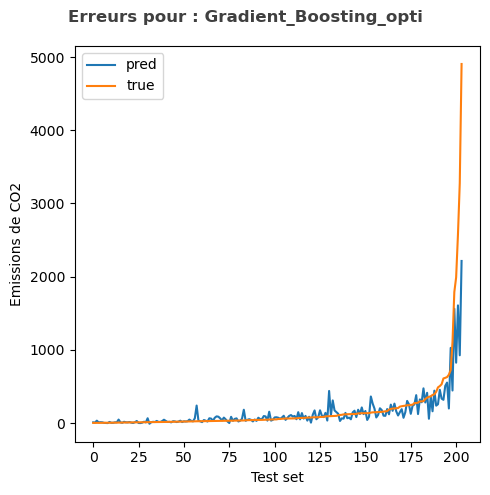

 Performance du modèle : Grid opimisation
 Erreur moy: 84.25
 R2: 0.6567 


In [39]:

model_GBR_opti = GradientBoostingRegressor(**best_GBR_params, random_state=randomN, verbose=False)

df_resultats_opti, y_pred = process_regression(model_GBR_opti, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_opti,'Gradient_Boosting_opti', 'RobustScaler','Grid opimisation',
                                              True, True, True, True)


In [40]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Gradient_Boosting') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Gradient_Boosting_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Gradient_Boosting') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Gradient_Boosting_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 8.93%. 
Amélioration de la durée : 56.48%. 


<a id='RF_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Random Forest Regressor**</span></span>

In [41]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'Random_Forest']


Modèle        Scaler    Durée       R2   MAE       MSE   RMSE  \
0  Random_Forest  RobustScaler  0.52026  0.51854  89.0  116114.3  340.8   

   CV Train R2  CV Test R2  CV Train MSE  CV Test MSE  
0     0.944212    0.650698   3391.874795  22978.59552

In [42]:

df_resultats_algo, y_pred = process_regression(model_RF, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','RobustScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 88.96
 R2: 0.5185 


In [43]:

# Paramètres de base d'un algorithme "Random Forest Regressor"
print("Les paramètres pour l'algorithme 'Random Forest Regressor':")
pprint(model_RF.get_params())


Les paramètres pour l'algorithme 'Random Forest Regressor':
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 84,
 'verbose': 0,
 'warm_start': False}


In [44]:

# Séléction des valeurs des hyperparamètres à tester
RF_params = {'n_estimators' : [50, 100, 150],
             'max_depth': [None, 5,10],
             'min_samples_split': [2,3,5,8,15]             
             }


In [45]:

#Cross validation des combinaisons des valeurs des differents paramètres

RF_grid = model_selection.GridSearchCV(model_RF, RF_params,
                                        cv =stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

RF_grid.fit(X_train_RS, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(error_score='raise',
             estimator=RandomForestRegressor(random_state=84),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 5, 8, 15],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

In [46]:

#
best_RF_params = RF_grid.best_params_
best_RF_params


{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}

In [47]:

# Création d'un dataframe pour enregistrer les résultats 
RF_params_results = pd.DataFrame(dtype='object')

resultize(RF_grid,RF_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
34       0.298268      0.000997         0.007722        0.000108   
4        0.400517      0.020908         0.008536        0.000155   

   param_max_depth param_n_estimators  \
34              10                100   
4             None                100   

                                               params  mean_test_score  \
34  {'max_depth': 10, 'min_samples_split': 3, 'n_e...         0.656567   
4   {'max_depth': None, 'min_samples_split': 3, 'n...         0.653814   

    std_test_score  rank_test_score  mean_train_score  std_train_score  
34        0.090606                1          0.929093         0.007861  
4         0.092703                2          0.933985         0.007314

In [48]:

model_RF_opti = GradientBoostingRegressor(**best_RF_params, random_state=randomN, verbose=False)

df_resultats_opti, y_pred = process_regression(model_RF_opti, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_opti,'Random_Forest_opti', 'RobustScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 108.00
 R2: 0.4794 


In [49]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Random_Forest') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Random_Forest_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Random_Forest') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Random_Forest_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : -7.55%. 
Amélioration de la durée : -4.89%. 


<a id='LightGBM_hyperparam'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Light Gradient Boosting Machine**</span></span>


In [50]:

df_resultats_algo.loc[df_resultats_algo['Modèle'] == 'Light_GBM']


Modèle        Scaler    Durée       R2    MAE       MSE   RMSE  \
0  Light_GBM  RobustScaler  0.31068  0.39235  102.0  146547.3  382.8   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.872976    0.594271   7710.219842  25352.081225

In [51]:

df_resultats_algo, y_pred = process_regression(model_lgbm, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_algo,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 102.16
 R2: 0.3923 


In [52]:

# Paramètres de base d'un algorithme "Light Gradient Boosting Machine"
print("Les paramètres pour l'algorithme 'Light Gradient Boosting Machine':")
pprint(model_lgbm.get_params())


Les paramètres pour l'algorithme 'Light Gradient Boosting Machine':
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 84,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [53]:

# Séléction des valeurs des hyperparamètres à tester
lgbm_params = {'n_estimators' : [50, 100, 150],
               'boosting_type': ['gbdt','dart'],
               'colsample_bytree': [0.75,1.0],
               'learning_rate' : [0.05,0.1, 0.2],
               'max_depth' : [-1, 3, 7],
               'num_leaves': [15,31,50]
               }


In [54]:

#Cross validation des combinaisons des valeurs des differents paramètres

lgbm_grid = model_selection.GridSearchCV(model_lgbm, lgbm_params,
                                        cv =stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

lgbm_grid.fit(X_train_RS, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(error_score='raise', estimator=LGBMRegressor(random_state=84),
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.75, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [-1, 3, 7],
                         'n_estimators': [50, 100, 150],
                         'num_leaves': [15, 31, 50]},
             return_train_score=True, verbose=1)

In [55]:

#
best_lgbm_params = lgbm_grid.best_params_
best_lgbm_params


{'boosting_type': 'dart',
 'colsample_bytree': 0.75,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 150,
 'num_leaves': 15}

In [56]:
# Création d'un dataframe pour enregistrer les résultats 
lgbm_params_results = pd.DataFrame(dtype='object')

In [57]:
resultize(lgbm_grid,lgbm_params_results).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
233       0.041091      0.000762         0.001211        0.000017   
232       0.044511      0.005152         0.001945        0.001270   
231       0.046308      0.005403         0.001331        0.000095   
224       0.132372      0.003180         0.001483        0.000036   
223       0.131099      0.004155         0.001487        0.000032   

    param_boosting_type param_colsample_bytree param_learning_rate  \
233                dart                   0.75                 0.2   
232                dart                   0.75                 0.2   
231                dart                   0.75                 0.2   
224                dart                   0.75                 0.2   
223                dart                   0.75                 0.2   

    param_max_depth param_n_estimators param_num_leaves  \
233               3                150               50   
232               3                150               31   
231               3                150               15   
224              -1                150               50   
223              -1                150               31   

                                                params  mean_test_score  \
233  {'boosting_type': 'dart', 'colsample_bytree': ...         0.632506   
232  {'boosting_type': 'dart', 'colsample_bytree': ...         0.632506   
231  {'boosting_type': 'dart', 'colsample_bytree': ...         0.632506   
224  {'boosting_type': 'dart', 'colsample_bytree': ...         0.630543   
223  {'boosting_type': 'dart', 'colsample_bytree': ...         0.630543   

     std_test_score  rank_test_score  mean_train_score  std_train_score  
233        0.036048                1          0.821594         0.010184  
232        0.036048                1          0.821594         0.010184  
231        0.036048                1          0.821594         0.010184  
224        0.062482                4          0.861234         0.010691  
223        0.062482                4          0.861234         0.010691

In [58]:

model_lgbm_opti = LGBMRegressor(**best_lgbm_params, random_state=randomN)

df_resultats_opti, y_pred = process_regression(model_lgbm_opti, 
                                               X_train_RS, X_test_RS,
                                               y_train, y_test,
                                               stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']),
                                               df_resultats_opti,'Light_GBM_opti', 'RobustScaler','Grid opimisation',
                                              True, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 98.74
 R2: 0.4152 


In [59]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Light_GBM') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Light_GBM_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_algo.loc[((df_resultats_algo['Modèle'] =='Light_GBM') & (df_resultats_algo['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_opti.loc[((df_resultats_opti['Modèle'] =='Light_GBM_opti') & (df_resultats_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 5.82%. 
Amélioration de la durée : -37.31%. 


<a id='selec_algo_co2'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Sélection du meilleur algorithme pour la estimation desEmissions de CO2</span>
    

**Tableau de résultats des scores par modèle**

In [60]:

bilan_opti_algo = df_resultats_opti.append(df_baseline, ignore_index=True)

bilan_opti_algo = bilan_opti_algo.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_opti_algo.style.hide(axis="index")

bilan_opti_algo



Modèle        Scaler    Durée       R2    MAE       MSE  \
0  Gradient_Boosting_opti  RobustScaler  0.29180  0.65672   84.0   82790.5   
1      Random_Forest_opti  RobustScaler  0.49483  0.47940  108.0  125554.5   
2          Light_GBM_opti  RobustScaler  0.19478  0.41517   99.0  141044.9   
3      DummyRegressorMean  RobustScaler  0.00036 -0.00879  176.0  243292.8   

    RMSE  CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0  287.7     0.993027    0.724368    416.014980  17391.378695  
1  354.3     0.999987    0.634219      0.709581  20228.344927  
2  375.6     0.821594    0.632506  10817.845359  22930.549321  
3  493.2     0.000000   -0.008111  60627.982419  60803.469355

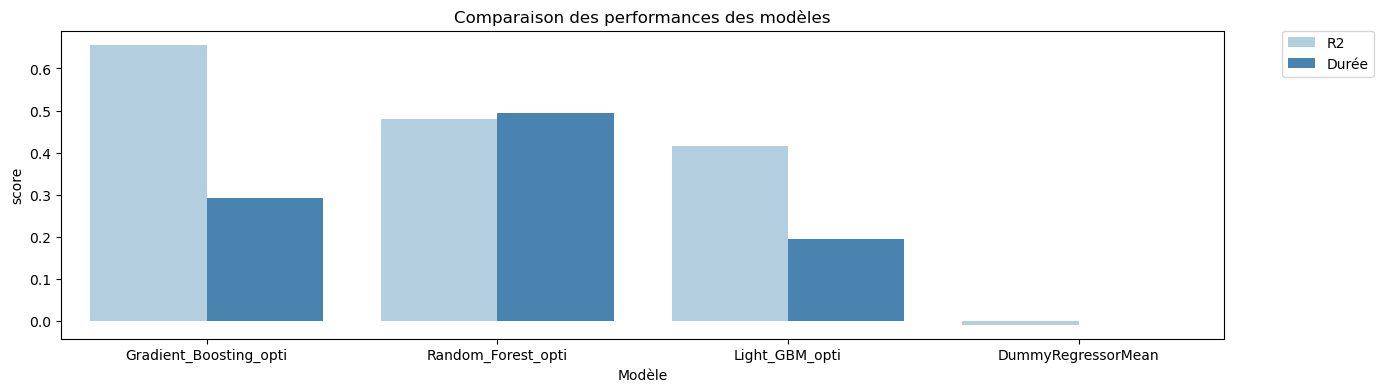

In [61]:

# Comparaison des 3 algorithmes les plus performants

comparaison_opti_score_melt1 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(15,4))
sns.barplot(x=comparaison_opti_score_melt1['Modèle'],
            y=comparaison_opti_score_melt1['score'], hue=comparaison_opti_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


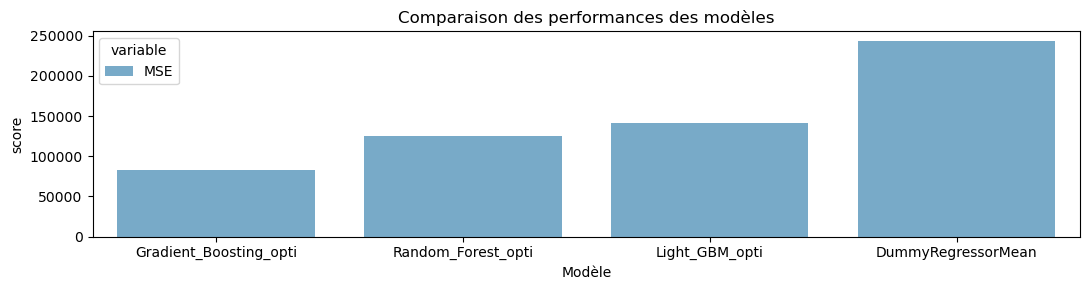

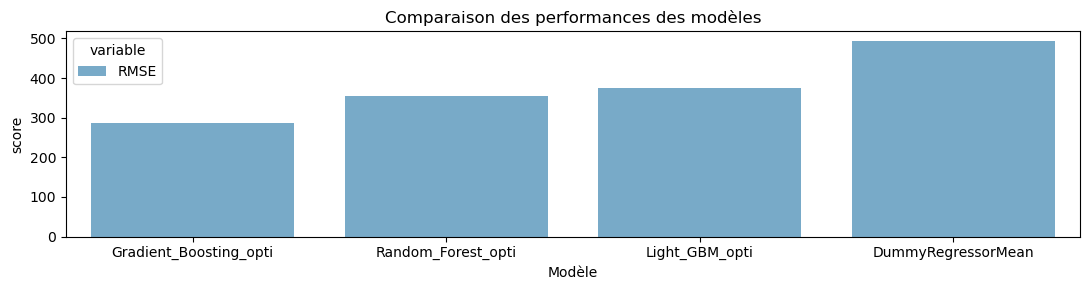

In [62]:

# Comparaison des 4 algorithmes les plus performants

comparaison_opti_score_melt2 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_opti_score_melt3 = pd.melt(bilan_opti_algo, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_opti_score_melt2['Modèle'],
            y=comparaison_opti_score_melt2['score'], hue=comparaison_opti_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_opti_score_melt3['Modèle'],
            y=comparaison_opti_score_melt3['score'], hue=comparaison_opti_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.tight_layout()  
plt.show()


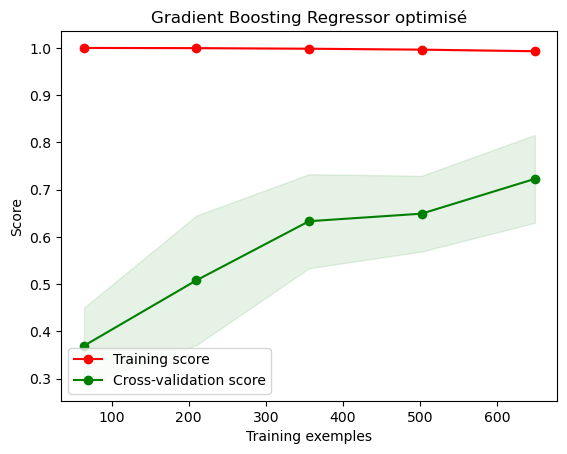

In [63]:

# Gradient Boosting Regressor
plot_learning_curve(model_GBR_opti, 'Gradient Boosting Regressor optimisé', X_train_RS, y_train, cv = stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']))




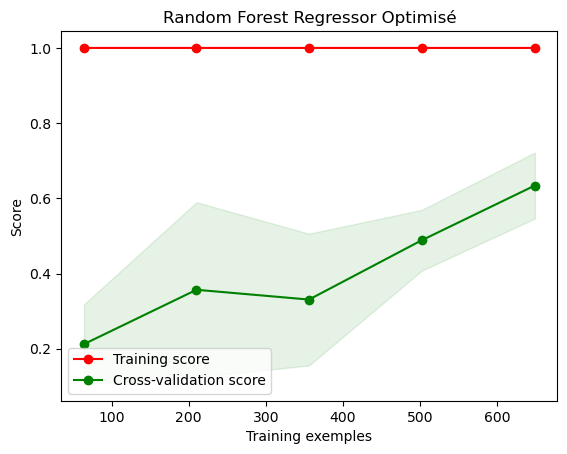

In [64]:

# Random Forest Regressor
plot_learning_curve(model_RF_opti, 'Random Forest Regressor Optimisé', X_train_RS, y_train, cv = stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']))




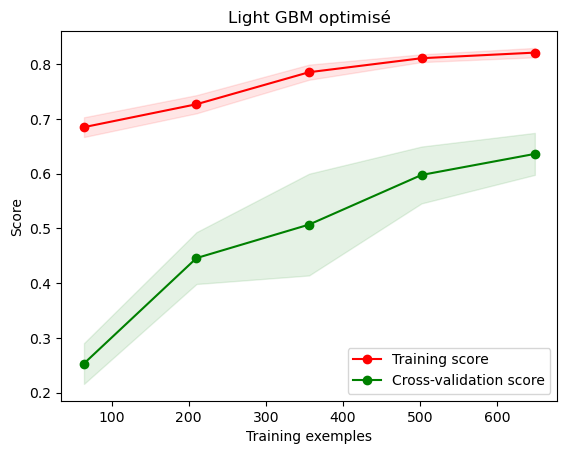

In [65]:

#  Light GBM
plot_learning_curve(model_lgbm_opti, 'Light GBM optimisé', X_train_RS, y_train, cv = stratified_cv(X_train, strat_train_set['TotalGHGEmissions_cat']))






**Bilan**

---

L'algorithme pour la prédiction des Émissions de CO2 présentant les meilleurs scores ainsi que la durée la plus courte est "Gradient Boosting Regressor"  sur le jeu de données ayant suivi une mise à l'échelle avec Robust Scaler.

---


<a id='pred_final_co2'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Prédictions émissions CO2 du modèle final** </span></span>



In [66]:

#---------------------------------------------------------------------------------------
# Chargement des jeux de données  utiles pour la comprehension des erreurs de prédiction
#---------------------------------------------------------------------------------------
source_BEB_2016 = pd.read_csv('/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_source/2016_Building_Energy_Benchmarking.csv', low_memory=False,encoding='utf-8')
index_BEB_2016 = pd.read_csv('index_BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')


In [67]:

model_GBR_opti.fit(X_train_RS, y_train)

# Predictions avec le train set
y_train_pred = model_GBR_opti.predict(X_train_RS)

# Predictions avec le test set
y_test_pred = model_GBR_opti.predict(X_test_RS)


<a id='features_importance_CO2'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables pour la estimation des emissions de CO2 </span>
    

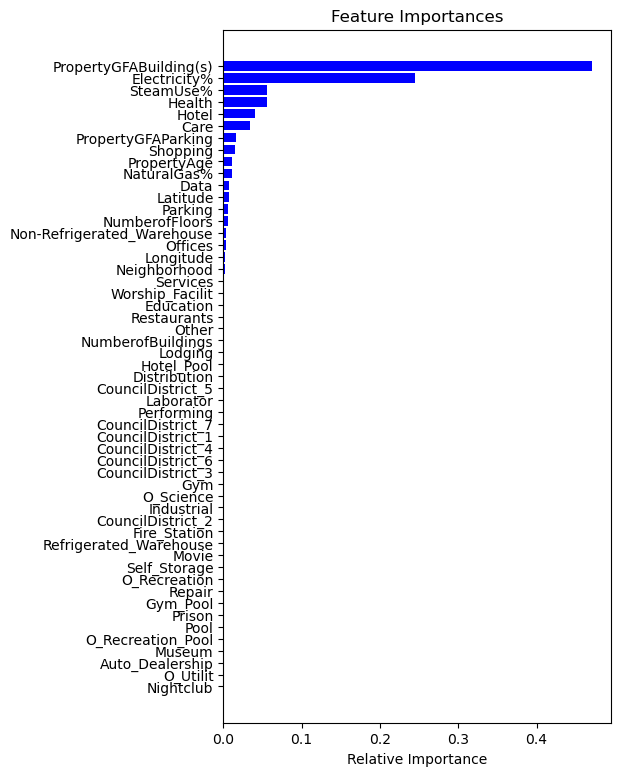

In [68]:

importances = model_GBR_opti.feature_importances_
indices = np.argsort(importances)
features = X_train_RS.columns

plt.figure(figsize=(5,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()




In [69]:

# Création du 'Explainer' en considerant la rélation entre les variables
#GBR_ridge_explainer = shap.KernelExplainer(model_GBR_opti, X_train_RS)

GBRopti_expl = shap.TreeExplainer(model_GBR_opti,X_test_RS)


In [70]:

# Préparation des paramètres pour les représentations graphiques

shap_values_exp = GBRopti_expl.shap_values(X_test_RS)
featureNames = model_Emi_BEB_2016.drop(columns=['TotalGHGEmissions','TotalGHGEmissions_cat'], axis=1).columns.tolist()
maxDisp = len(featureNames)


In [71]:

# Importance des variables global
valeurs= np.abs(shap_values_exp).mean(0)
global_feature_importance = pd.DataFrame(list(zip(X_test_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
global_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
global_feature_importance = global_feature_importance.reset_index(drop=True)


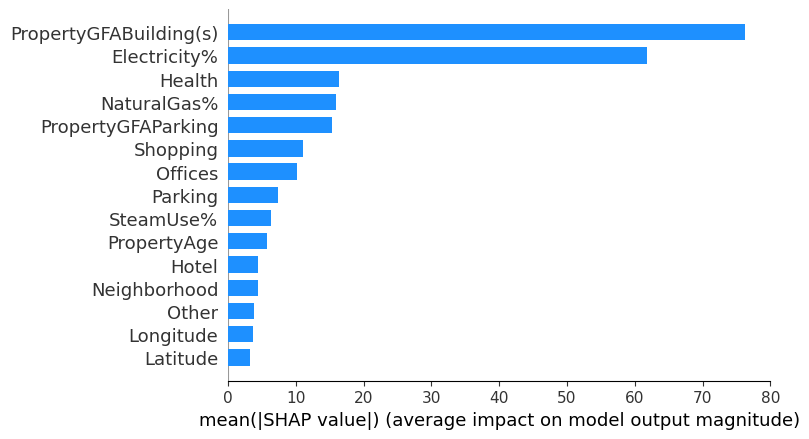

In [72]:

shap.summary_plot(shap_values_exp, max_display=15, plot_type="bar",feature_names=featureNames, color="dodgerblue", plot_size = 0.2)


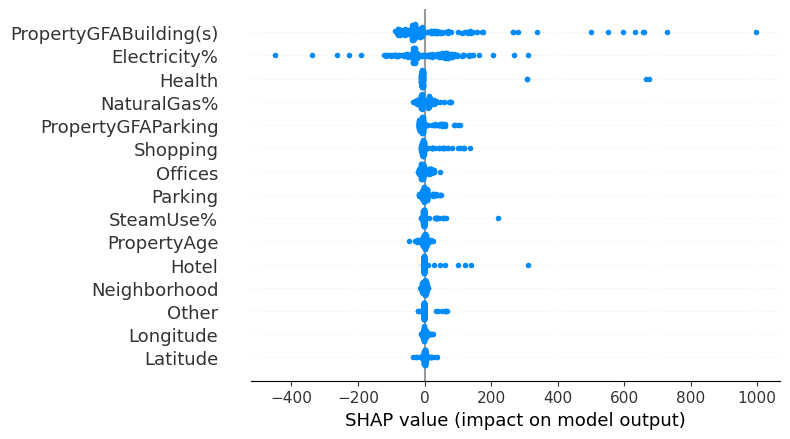

In [73]:

shap.summary_plot(shap_values_exp, max_display=15,feature_names=featureNames, plot_size = 0.2)


In [74]:

shap.plots.force(GBRopti_expl.expected_value, shap_values_exp, feature_names=featureNames, out_names="Emissions de CO2")


<a id='pred_errors_Co2'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Erreurs de prédiction </span>



<span style='color:#67d1e9'>**Erreurs sur le train set**</span>


In [75]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_train = pd.DataFrame({'y_train_pred': y_train_pred, 'y_train': y_train})
df_error_train['erreur_abs'] = abs(y_train_pred - y_train)


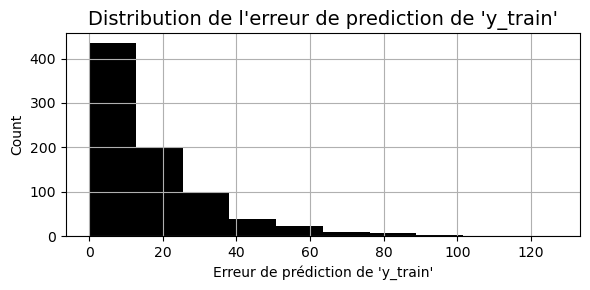

In [76]:

# Répresentation graphique de l'erreur absolut de predction du set de entraînement
df_error_train['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_train'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_train'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()



<span style='color:#67d1e9'>**Erreurs sur le test set**</span>


In [77]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_test = pd.DataFrame({'y_test_pred': y_test_pred, 'y_test': y_test})
df_error_test['erreur_abs'] = abs(y_test_pred - y_test)


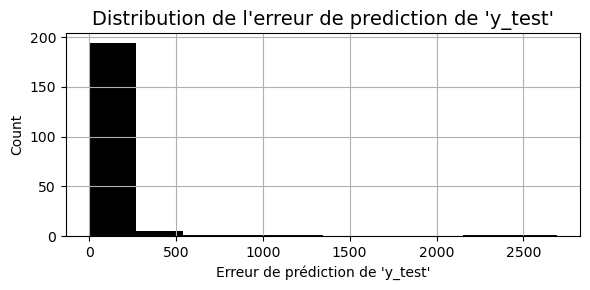

In [78]:

# Répresentation graphique de l'erreur absolut de predction du set de test
df_error_test['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_test'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_test'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()


In [79]:
df_error_test['erreur_abs'].describe()

count     204.000000
mean       84.254616
std       275.797986
min         0.271283
25%         7.027779
50%        24.847937
75%        57.580761
max      2691.846080
Name: erreur_abs, dtype: float64

<a id='min_max_error'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur maximale et minimale sur le jeu de test**</span></span>

In [80]:
# Erreur maximale
df_error_max = df_error_test[df_error_test['erreur_abs'] == df_error_test['erreur_abs'].max()]
df_error_max


y_test_pred   y_test  erreur_abs
76   2214.48392  4906.33  2691.84608

In [81]:

# Obtention des les informations concernant la propriété associée à l'erreur
print("La propriétée avec l'erreur de prédiction maximale est : \n")

prop_max_error = index_BEB_2016.iloc[df_error_max.index.to_list(), :]
OSEBuildingID_prop_max_error = prop_max_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_max_error[0]]


La propriétée avec l'erreur de prédiction maximale est : 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType PropertyName  \
89            131      2016  NonResidential               Other     Lakeview   

            Address     City State  ZipCode TaxParcelIdentificationNumber  \
89  1208 NE 64th st  Seattle    WA  98115.0                    1797500625   

    CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
89                    4    NORTHEAST  47.67524 -122.31534       1941   

    NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
89                1.0               4             56521                   0   

    PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
89                   56521                     Other                  Other   

    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
89                    49000.0                          NaN   

    SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
89                              NaN                         NaN   

    ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
89                             NaN                      NaN              NaN   

    SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
89        129.699997          129.899994          407.399994   

    SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
89                 408.0            6357632.0              6367210.0   

    SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
89             0.0       1863315.125          6357631.0                 0.0   

    NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
89               0.0        False       NaN        Compliant     NaN   

    TotalGHGEmissions  GHGEmissionsIntensity  
89              44.32                   0.78

In [82]:
# Erreur minimale
df_error_min = df_error_test[df_error_test['erreur_abs'] == df_error_test['erreur_abs'].min()]
df_error_min


y_test_pred  y_test  erreur_abs
721    22.751283   22.48    0.271283

In [83]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("La propriétée avec l'erreur de prédiction minimale est : \n")

prop_min_error = index_BEB_2016.iloc[df_error_min.index.to_list(), :]
OSEBuildingID_prop_min_error = prop_min_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_min_error[0]]


La propriétée avec l'erreur de prédiction minimale est : 



OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
1093          20815      2016  NonResidential  Small- and Mid-Sized Office   

     PropertyName              Address     City State  ZipCode  \
1093        SPRAG  2517 Eastlake Ave E  Seattle    WA  98104.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
1093                    1959700023                    4   LAKE UNION   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
1093  47.64243 -122.32618       1957                1.0               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1093             21183                   0                   21183   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
1093           Office, Parking                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1093                    13945.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1093                           7238.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1093                             NaN                 20152012   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1093             99.0              25.9                25.9   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
1093           81.400002             81.400002          361542.0938   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
1093            361542.0938             0.0       105961.8984   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
1093           361542.0                 0.0               0.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
1093       NaN        Compliant     NaN               2.52   

      GHGEmissionsIntensity  
1093                   0.12

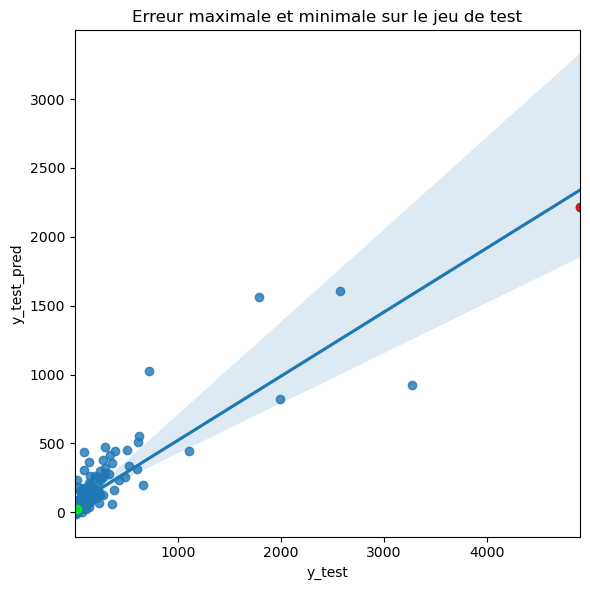

In [84]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_error_max, x=df_error_max['y_test'], y=df_error_max['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_error_min, x=df_error_min['y_test'], y=df_error_min['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur maximale et minimale sur le jeu de test')
    
plt.tight_layout() 
plt.show()


In [85]:
# Position de l'éntrée associée au erreur maximal dans le test set
X_test_item = [i for i,index in enumerate(X_test_RS.index.tolist()) if index == df_error_max.index]

# Importance des variables erreur max
valeurs= np.abs(shap_values_exp[X_test_item]).mean(0)
error_max_feature_importance = pd.DataFrame(list(zip(X_test_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_max_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_max_feature_importance = error_max_feature_importance.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur maximale
shap.plots.force(GBRopti_expl.expected_value, shap_values_exp[X_test_item], feature_names=featureNames, out_names="Emissions de CO2")


In [86]:
# Position de l'éntrée associée au erreur minimale dans le test set
X_test_item = [i for i,index in enumerate(X_test_RS.index.tolist()) if index == df_error_min.index]

# Importance des variables erreur min
valeurs= np.abs(shap_values_exp[X_test_item]).mean(0)
error_min_feature_importance = pd.DataFrame(list(zip(X_test_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_min_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_min_feature_importance =error_min_feature_importance.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur minimale
shap.plots.force(GBRopti_expl.expected_value, shap_values_exp[X_test_item], feature_names=featureNames, out_names="Emissions de CO2")


<a id='erreur_sup99'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 supérieur à celui du 99% des prédictions restantes**</span></span>

In [87]:
# Erreur sur le jeu de test de plus de 99%
df_erreur_sup99 = df_error_test[df_error_test['erreur_abs'] > df_error_test['erreur_abs'].quantile(0.99)]
df_erreur_sup99=df_erreur_sup99.sort_values(by=['erreur_abs'], ascending=[False])


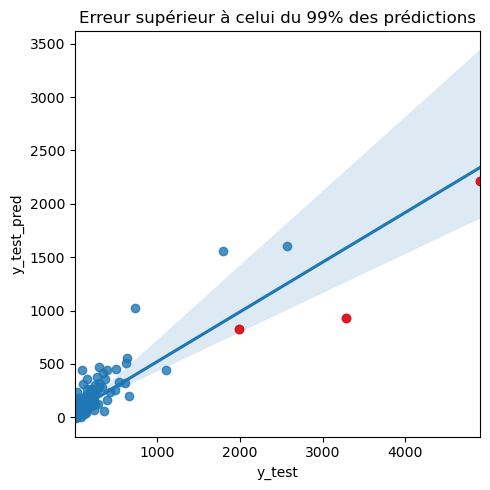

In [88]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup99, x=df_erreur_sup99['y_test'], y=df_erreur_sup99['y_test_pred'], color ='red', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur supérieur à celui du 99% des prédictions')
    
plt.tight_layout() 
plt.show()


In [89]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 99% des prédictions restantes

print("Il y a " + str(df_erreur_sup99.shape[0]) + " propriétées dont l'erreur de prédiction des emissions de CO2 est supérieur à celui du 99% des prédictions restantes. Il s'agit de: \n")

prop_99_error = index_BEB_2016.iloc[df_erreur_sup99.index.to_list(), :]
OSEBuildingID_prop_99_error = prop_99_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_99_error)]


Il y a 3 propriétées dont l'erreur de prédiction des emissions de CO2 est supérieur à celui du 99% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
65              96      2016  NonResidential  Mixed Use Property   
89             131      2016  NonResidential               Other   
974          20396      2016  NonResidential           Warehouse   

        PropertyName            Address     City State  ZipCode  \
65   Central Seattle     921 Terry Ave.  Seattle    WA  98104.0   
89          Lakeview    1208 NE 64th st  Seattle    WA  98115.0   
974  Meaves Building  1014 First Avenue  Seattle    WA  98101.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
65                     1979200290                    3         EAST  47.60845   
89                     1797500625                    4    NORTHEAST  47.67524   
974                    0939000530                    7     DOWNTOWN  47.60528   

     Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
65  -122.32637       1983                1.0               6   
89  -122.31534       1941                1.0               4   
974 -122.33627       1900                1.0               5   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
65              99780                9341                   90439   
89              56521                   0                   56521   
974             33300                   0                   33300   

                             ListOfAllPropertyUseTypes  \
65   Data Center, Medical Office, Non-Refrigerated ...   
89                                               Other   
974           Non-Refrigerated Warehouse, Retail Store   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
65               Medical Office                    40174.0   
89                        Other                    49000.0   
974  Non-Refrigerated Warehouse                    24000.0   

    SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
65                       Parking                          20868.0   
89                           NaN                              NaN   
974                 Retail Store                           6000.0   

    ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
65                       Office                         17020.0   
89                          NaN                             NaN   
974                         NaN                             NaN   

    YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
65                       NaN              NaN        204.500000   
89                       NaN              NaN        129.699997   
974                      NaN              NaN          3.000000   

     SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
65           207.300003          505.799988            504.299988   
89           129.899994          407.399994            408.000000   
974            3.000000            9.500000              9.500000   

     SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
65          1.547312e+07           1.568437e+07       5327802.5   
89          6.357632e+06           6.367210e+06             0.0   
974         9.055870e+04           9.055870e+04             0.0   

     Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
65       2.973421e+06         10145313.0                 0.0   
89       1.863315e+06          6357631.0                 0.0   
974      2.654120e+04            90559.0                 0.0   

     NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
65                0.0        False       NaN        Compliant     NaN   
89                0.0        False       NaN        Compliant     NaN   
974               0.0        False       NaN        Compliant     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity  
65              481.97                   4.83  
89               44.32                   0.78  
974               0.63                   0.02

In [90]:

# Position des propriétés avec un erreur associé supérieur à celui du 99% des prédictions restantes

# Liste des indices concernées 
erreur_sup99_idx_list = df_erreur_sup99.index.tolist()
X_test_RS_idx = X_test_RS.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_RS_idx)) if X_test_RS_idx[i] in erreur_sup99_idx_list]


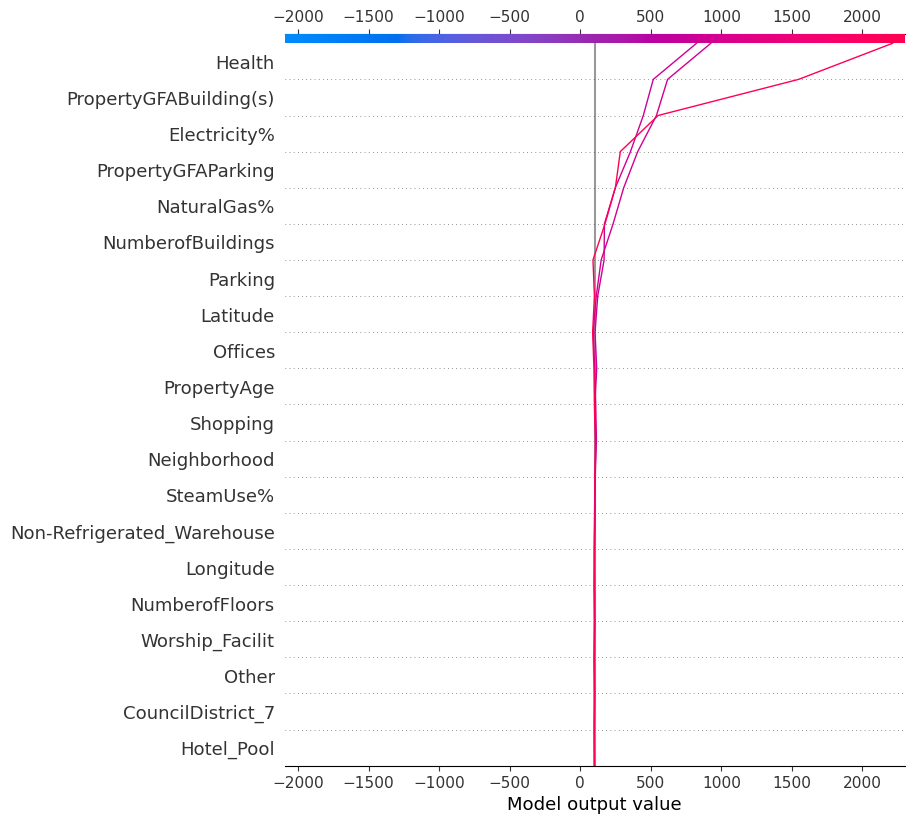

In [91]:

# Importance des variables error_sup99
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
error_sup99_feature_importance = pd.DataFrame(list(zip(X_train_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_sup99_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_sup99_feature_importance =error_sup99_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_RS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_sup95'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 supérieur à celui du 95% des prédictions restantes**</span></span>

In [92]:

#  erreur sur le jeu de test de plus de 95%
df_erreur_sup95 = df_error_test[df_error_test['erreur_abs']> df_error_test['erreur_abs'].quantile(0.95)]
df_erreur_sup95=df_erreur_sup95.sort_values(by=['erreur_abs'], ascending=[False])


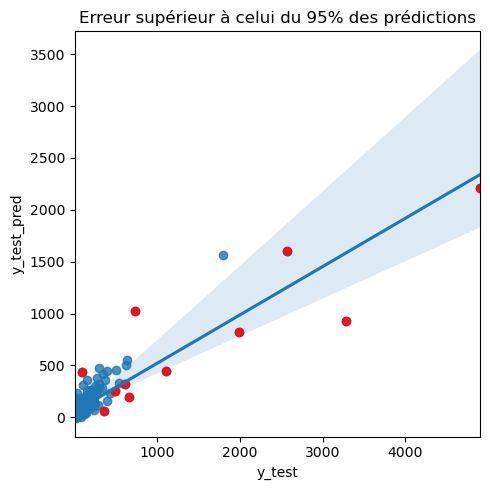

In [93]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup95, x=df_erreur_sup95['y_test'], y=df_erreur_sup95['y_test_pred'], color ='red', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur supérieur à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [94]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_sup95.shape[0]) + " propriétées dont l'erreur de prédiction de leur emission de CO2 est supérieur à celui du 95% des prédictions restantes. Il s'agit de: \n")

prop_95_error = index_BEB_2016.iloc[df_erreur_sup95.index.to_list(), :]
OSEBuildingID_prop_95_error = prop_95_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_95_error)]


Il y a 11 propriétées dont l'erreur de prédiction de leur emission de CO2 est supérieur à celui du 95% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear        BuildingType    PrimaryPropertyType  \
45               58      2016      NonResidential                  Other   
65               96      2016      NonResidential     Mixed Use Property   
70              104      2016  Nonresidential COS                  Other   
89              131      2016      NonResidential                  Other   
100             163      2016  Nonresidential COS                  Other   
197             317      2016  Nonresidential COS                  Other   
380             533      2016      NonResidential  Self-Storage Facility   
661           19491      2016              Campus                  Other   
974           20396      2016      NonResidential              Warehouse   
989           20433      2016      NonResidential                  Other   
1538          22332      2016      NonResidential                  Other   

                        PropertyName                Address     City State  \
45                   1525 4th Avenue           1525 4th Ave  Seattle    WA   
65                   Central Seattle         921 Terry Ave.  Seattle    WA   
70             Bagley Wright Theatre         151 Mercer St.  Seattle    WA   
89                          Lakeview        1208 NE 64th st  Seattle    WA   
100          Fire Station 10/FAC/EOC          105 5th Ave S  Seattle    WA   
197                 Seattle Aquarium       1421 Alaskan Way  Seattle    WA   
380        08168-Queen Anne/Magnolia     3000 15th Ave West  Seattle    WA   
661   Pacific Multiforms Inc- Campus  6606 Urusla Pl. South  Seattle    WA   
974                  Meaves Building      1014 First Avenue  Seattle    WA   
989                West Seattle Bowl      4505  39th Ave SW  Seattle    WA   
1538                  Ballard Square  2228 NW Market Street  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
45    98101.0                    1975700365                    7   
65    98104.0                    1979200290                    3   
70    98109.0                    1985200003                    7   
89    98115.0                    1797500625                    4   
100   98104.0                    5247801465                    2   
197   98101.0                    7666202420                    7   
380   98119.0                    2770603715                    7   
661   98155.0                    0005200056                    2   
974   98101.0                    0939000530                    7   
989   98116.0                    0952007220                    1   
1538  98107.0                    2767701080                    6   

               Neighborhood  Latitude  Longitude  YearBuilt  \
45                 DOWNTOWN  47.61076 -122.33765       1920   
65                     EAST  47.60845 -122.32637       1983   
70    MAGNOLIA / QUEEN ANNE  47.62208 -122.35398       1962   
89                NORTHEAST  47.67524 -122.31534       1941   
100                DOWNTOWN  47.60112 -122.32785       2006   
197                DOWNTOWN  47.60729 -122.34211       1980   
380   MAGNOLIA / QUEEN ANNE  47.64676 -122.37581       1988   
661        GREATER DUWAMISH  47.54134 -122.30529       1994   
974                DOWNTOWN  47.60528 -122.33627       1900   
989               SOUTHWEST  47.56263 -122.38196       1948   
1538                BALLARD  47.66908 -122.38627       1928   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
45                  1.0               2             57428                   0   
65                  1.0               6             99780                9341   
70                  1.0               1             91213                   0   
89                  1.0               4             56521                   0   
100                 1.0               4             61156                   0   
197                 1.0               2             69400                   0   
380            

In [95]:

# Position des propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

# Liste des indices concernées 
erreur_sup95_idx_list = df_erreur_sup95.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_RS_idx)) if X_test_RS_idx[i] in erreur_sup95_idx_list]


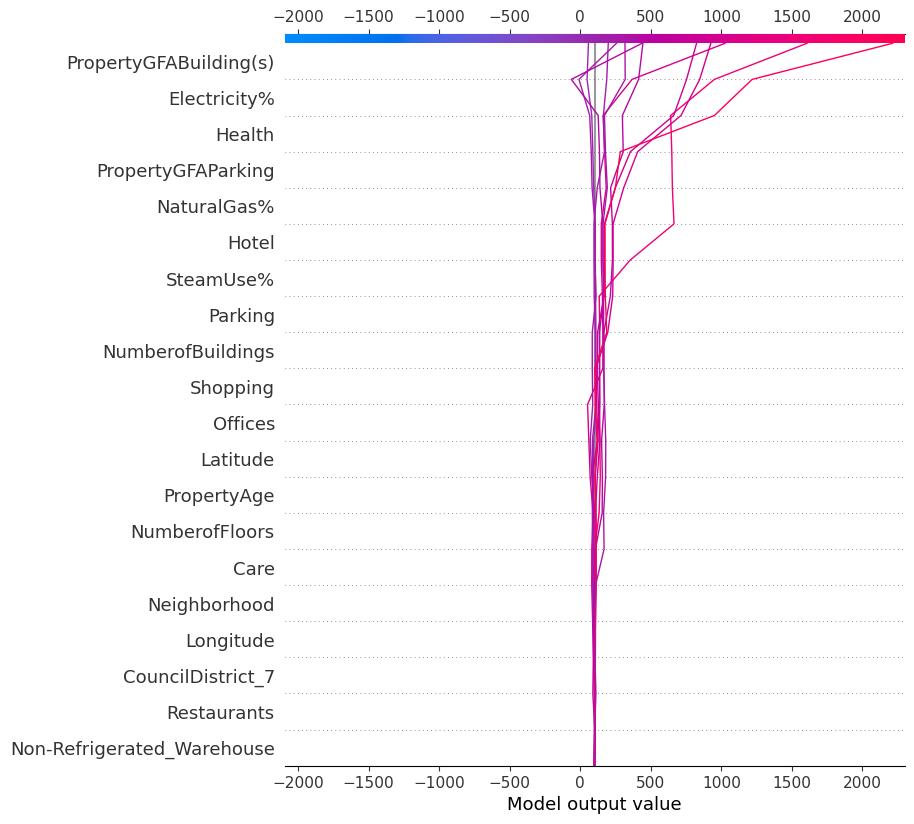

In [96]:

# Importance des variables error_sup95
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
error_sup95_feature_importance = pd.DataFrame(list(zip(X_train_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_sup95_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_sup95_feature_importance =error_sup95_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_RS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_inf5'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 inférieur à celui du 95% des prédictions restantes**</span></span>

In [97]:

#  erreur sur le jeu de test de moins de 5%
df_erreur_inf5 = df_error_test[df_error_test['erreur_abs'] < df_error_test['erreur_abs'].quantile(0.5)]


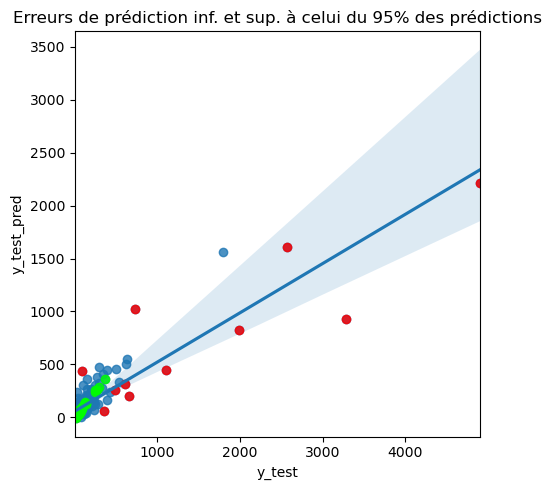

In [98]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_sup95, x=df_erreur_sup95['y_test'], y=df_erreur_sup95['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_erreur_inf5, x=df_erreur_inf5['y_test'], y=df_erreur_inf5['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreurs de prédiction inf. et sup. à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [99]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_inf5.shape[0]) + " propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf95_error = index_BEB_2016.iloc[df_erreur_inf5.index.to_list(), :]
OSEBuildingID_prop_inf95_error = prop_inf95_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf95_error)]


Il y a 102 propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
33               40      2016  NonResidential                        Hotel   
54               69      2016  NonResidential                        Hotel   
131             215      2016  NonResidential                    Warehouse   
...             ...       ...             ...                          ...   
1672          23071      2016  NonResidential                     Hospital   
1675          23076      2016  NonResidential             Worship Facility   
1745          23297      2016  NonResidential               Residence Hall   
1755          23313      2016  NonResidential  Small- and Mid-Sized Office   
1767          23343      2016  NonResidential                        Other   

                       PropertyName                          Address     City  \
0              Mayflower park hotel                    405 Olive way  Seattle   
1                   Paramount Hotel                  724 Pine street  Seattle   
33          Silver Cloud University                 5036 25th Ave NE  Seattle   
54              Sequim Lodging Corp                 226 Aurora Ave N  Seattle   
131          Rainier Bottling Plant           5628 Airport Way South  Seattle   
...                             ...                              ...      ...   
1672      Main Hospital - All Wings  Facilities Management MS: B-120  Seattle   
1675  North Seattle Alliance Church             2150 N. 122nd Street  Seattle   
1745  St. James Cathedral & Rectory                     804 9th Ave.  Seattle   
1755         Swedish Invex Building                 1115 Columbia St  Seattle   
1767                      LAKE CITY                12550 26TH AVE NE  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0       WA  98101.0                    0659000030                    7   
1       WA  98101.0                    0659000220                    7   
33      WA  98105.0                    0925049117                    4   
54      WA  98109.0                    1991200940                    7   
131     WA  98108.0                    3466800065                    2   
...    ...      ...                           ...                  ...   
1672    WA  98133.0                    3026049130                    5   
1675    WA  98133.0                    3034200285                    5   
1745    WA  98104.0                    8590900085                    3   
1755    WA  98122.0                    8590900690                    3   
1767    WA  98125.0                    3834500515                    5   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
33           NORTHEAST  47.66583 -122.29965       1994                1.0   
54          LAKE UNION  47.62025 -122.34314       1997                1.0   
131   GREATER DUWAMISH  47.55152 -122.31869       1904                1.0   
...                ...       ...        ...        ...                ...   
1672         NORTHWEST  47.71425 -122.33689       1966                8.0   
1675         NORTHWEST  47.71745 -122.33221       1965                1.0   
1745              EAST  47.60730 -122.32585       1904                1.0   
1755              EAST  47.60819 -122.32282       1956                1.0   
1767             NORTH  47.72083 -122.29979       1969                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
33                 4             81871                   0   
54                 6            11

In [100]:

# Position des propriétés avec un erreur associé inférieur à celui du 90% des prédictions restantes

# Liste des indices concernées 
erreur_inf95_idx_list = df_erreur_inf5.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_RS_idx)) if X_test_RS_idx[i] in erreur_inf95_idx_list]


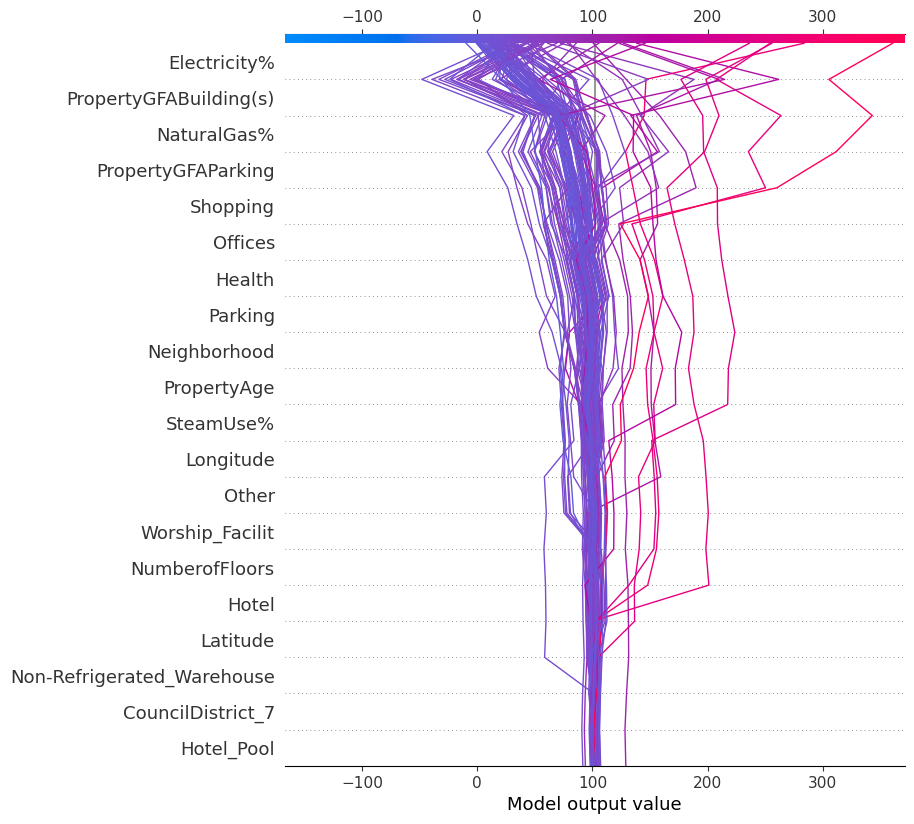

In [101]:

# Importance des variables erreur_inf95
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
erreur_inf95_feature_importance = pd.DataFrame(list(zip(X_train_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf95_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf95_feature_importance =erreur_inf95_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_RS.iloc[X_test_items]), feature_names=featureNames)


<a id='erreur_inf1'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 inférieur à celui du 99% des prédictions restantes**</span></span>

In [102]:

#  erreur sur le jeu de test de moins de 1%
df_erreur_inf1 = df_error_test[df_error_test['erreur_abs'] < df_error_test['erreur_abs'].quantile(0.01)]


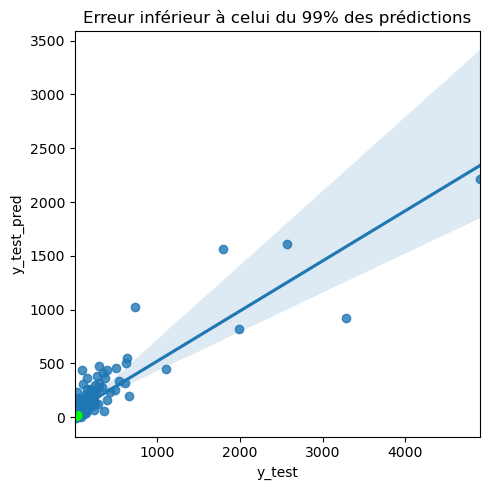

In [103]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test, x=y_test, y=y_test_pred)
sns.regplot(data = df_erreur_inf1, x=df_erreur_inf1['y_test'], y=df_erreur_inf1['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur inférieur à celui du 99% des prédictions')
    
plt.tight_layout() 
plt.show()


In [104]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("Il y a " + str(df_erreur_inf1.shape[0]) + " propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf99_error = index_BEB_2016.iloc[df_erreur_inf1.index.to_list(), :]
OSEBuildingID_prop_inf99_error = prop_inf99_error['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf99_error)]


Il y a 3 propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
251             376      2016  NonResidential                 Large Office   
773           19845      2016  NonResidential                 Retail Store   
1093          20815      2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address     City State  ZipCode  \
251     5th and Bell         2301 5th Ave  Seattle    WA  98121.0   
773   000956-Seattle     4900 25th Ave Ne  Seattle    WA  98105.0   
1093           SPRAG  2517 Eastlake Ave E  Seattle    WA  98104.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
251                     0696000175                    7     DOWNTOWN   
773                     0925049406                    4    NORTHEAST   
1093                    1959700023                    4   LAKE UNION   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
251   47.61598 -122.34369       2002                1.0               6   
773   47.66460 -122.29932       1996                1.0               1   
1093  47.64243 -122.32618       1957                1.0               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
251             287471               83591                  203880   
773              25735                   0                   25735   
1093             21183                   0                   21183   

                           ListOfAllPropertyUseTypes LargestPropertyUseType  \
251   Office, Other, Other - Restaurant/Bar, Parking                 Office   
773                                     Retail Store           Retail Store   
1093                                 Office, Parking                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
251                    191814.0                      Parking   
773                     25691.0                          NaN   
1093                    13945.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
251                           72178.0      Other - Restaurant/Bar   
773                               NaN                         NaN   
1093                           7238.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
251                           5322.0     20162011201020092008   
773                              NaN                     2013   
1093                             NaN                 20152012   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
251              74.0         74.900002           74.900002   
773              82.0         45.500000           48.500000   
1093             99.0         25.900000           25.900000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
251           235.100006            235.100006         1.491342e+07   
773           125.400002            128.500000         1.169395e+06   
1093           81.400002             81.400002         3.615421e+05   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
251            1.491342e+07             0.0      4.370874e+06   
773            1.245673e+06             0.0      2.795120e+05   
1093           3.615421e+05             0.0      1.059619e+05   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
251          14913422.0                 0.0               0.0        False   
773            953695.0              2157.0          215700.0        False   
1093           361542.0                 0.0               0.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
251        NaN        Compliant     NaN             103.97   
773        NaN        Compliant     NaN              18.10   
1093       NaN        Compliant     NaN               2.52   

      GHGEmissionsIntensity  
251                    0.36  
773         

In [105]:

# Position des propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
# Liste des indices concernées 
erreur_inf99_idx_list = df_erreur_inf1.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_items = [i for i in range(len(X_test_RS_idx)) if X_test_RS_idx[i] in erreur_inf99_idx_list]


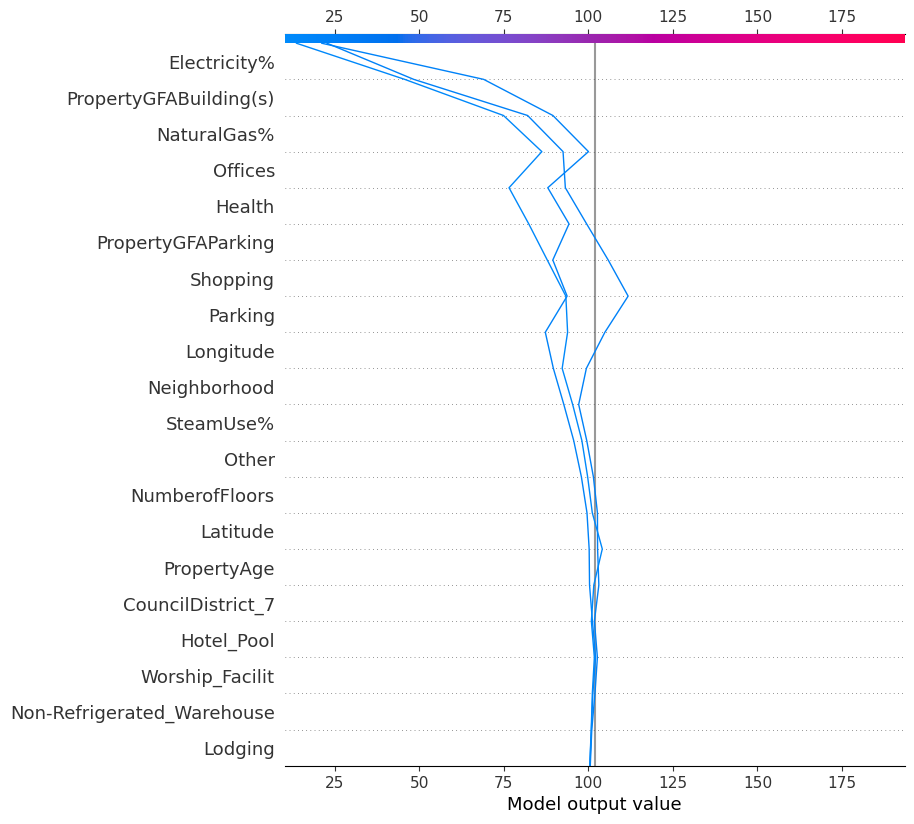

In [106]:

# Importance des variables erreur_inf99
valeurs= np.abs(shap_values_exp[X_test_items]).mean(0)
erreur_inf99_feature_importance = pd.DataFrame(list(zip(X_train_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf99_feature_importance.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf99_feature_importance =erreur_inf99_feature_importance.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_expl.expected_value, GBRopti_expl.shap_values(X_test_RS.iloc[X_test_items]), feature_names=featureNames)


<a id='errors_feature_importance'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables associées aux erreurs plus/moins importants </span>


In [107]:

#----------------------------------------------------------
#Tableau synthèse differences en l'importance des variables
#----------------------------------------------------------

global_feature_imp_cls = global_feature_importance.reset_index().copy()
global_feature_imp_cls = global_feature_imp_cls.rename(columns={"index": "Global"}).drop(columns='feature_importance_valeurs').head(10)
global_feature_imp_cls["Global"] = global_feature_imp_cls["Global"]+1

error_max_feature_imp_cls = error_max_feature_importance.reset_index().copy()
error_max_feature_imp_cls = error_max_feature_imp_cls.rename(columns={"index": "ErreurMax"}).drop(columns='feature_importance_valeurs').head(10)
error_max_feature_imp_cls["ErreurMax"] = error_max_feature_imp_cls["ErreurMax"]+1

error_min_feature_imp_cls = error_min_feature_importance.reset_index().copy()
error_min_feature_imp_cls = error_min_feature_imp_cls.rename(columns={"index": "ErreurMin"}).drop(columns='feature_importance_valeurs').head(10)
error_min_feature_imp_cls["ErreurMin"] = error_min_feature_imp_cls["ErreurMin"]+1

error_sup95_feature_imp_cls = error_sup95_feature_importance.reset_index().copy()
error_sup95_feature_imp_cls = error_sup95_feature_imp_cls.rename(columns={"index": "Error_sup95"}).drop(columns='feature_importance_valeurs').head(10)
error_sup95_feature_imp_cls["Error_sup95"] = error_sup95_feature_imp_cls["Error_sup95"]+1

erreur_inf95_feature_imp_cls = erreur_inf95_feature_importance.reset_index().copy()
erreur_inf95_feature_imp_cls = erreur_inf95_feature_imp_cls.rename(columns={"index": "Error_inf90"}).drop(columns='feature_importance_valeurs').head(10)
erreur_inf95_feature_imp_cls["Error_inf90"] = erreur_inf95_feature_imp_cls["Error_inf90"]+1

df_features_importance_classement = reduce(lambda x,y: pd.merge(x,y, on='Variable', how='outer'),[error_max_feature_imp_cls, error_sup95_feature_imp_cls,\
                                                                                                  global_feature_imp_cls,\
                                                                                                  erreur_inf95_feature_imp_cls ,error_min_feature_imp_cls])

context = df_features_importance_classement.columns.tolist()
context.remove('Variable')


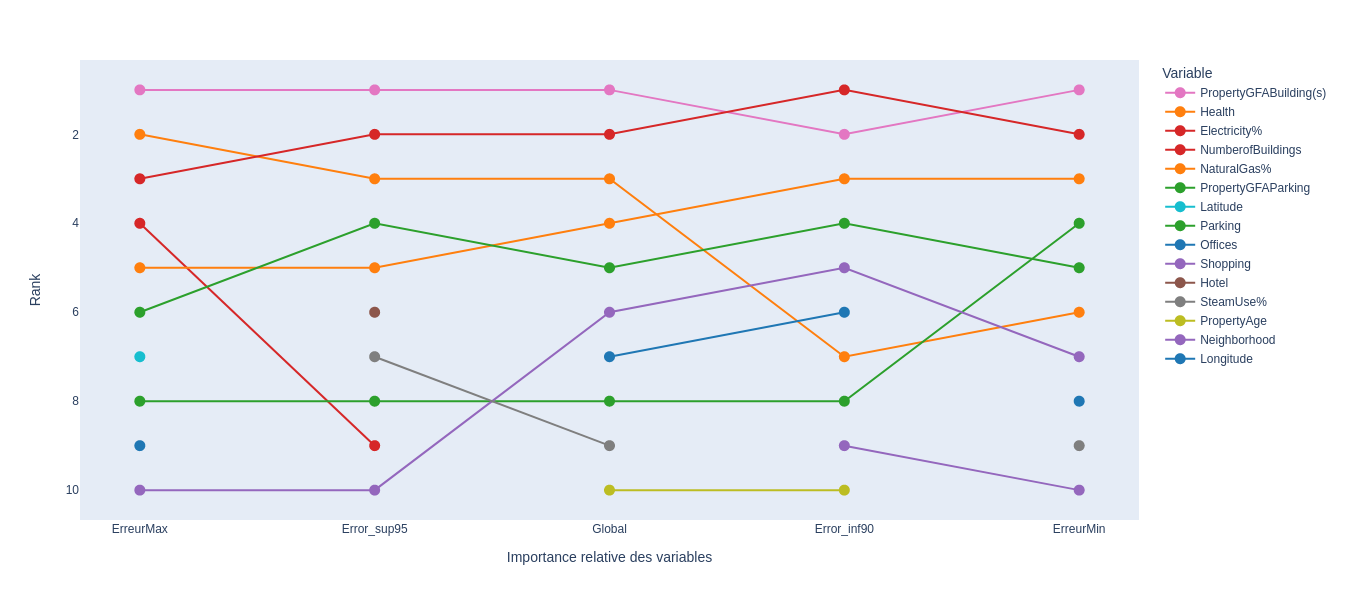

In [108]:

#----------------------------------------------
#Visualisation de l'évolution de l'attractivité
#----------------------------------------------

##
#Data
##
df_featImport_classement = pd.melt(frame = df_features_importance_classement, id_vars=["Variable"], value_vars = (context),\
                                   var_name="context", value_name="Importance")  
df_featImport_classement.head()


##
#Graph
##

#extract color palette, the palette can be changed
list_variables = list(set(df_featImport_classement['Variable']))
pal = list(sns.color_palette(n_colors=len(list_variables)).as_hex())
dict_color = dict(zip(list_variables, pal))

fig = px.line(df_featImport_classement, x = 'context', y = 'Importance',color = 'Variable', color_discrete_map= dict_color, markers=True, width=1000, height=600)
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(autorange='reversed', title='Rank',visible=True, showticklabels=True)
fig.update_xaxes(title='Importance relative des variables', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False) )

fig.show()


<a id='predic_CO2_energy_score'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Prédiction des émissions de CO2 avec "ENERGY STAR Score"** </span></span>




---
---

<font size="+1">**Aperçu du jeu de données**</font>


In [109]:

#-----------------------------------
# Chargement du  fichier des données
#-----------------------------------
data_BEB_2016 = pd.read_csv('BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')

#-------------------------------------------------------------------------------------------------
# Réduction du dataset aux variables nécessaires pour la modélisation de la consommation d'énergie
#-------------------------------------------------------------------------------------------------
model_Emi_EnergyStar_BEB_2016 = data_BEB_2016.drop(columns=['SiteEnergyUseWN(kBtu)'])
model_Emi_EnergyStar_BEB_2016 = model_Emi_EnergyStar_BEB_2016[model_Emi_EnergyStar_BEB_2016['ENERGYSTARScore'].notna()].reset_index(drop=True)

#-----------------------------------
# Taille du  fichier des données
#-----------------------------------
print("Le jeux de données contient " + str(model_Emi_EnergyStar_BEB_2016.shape[0]) + " lignes et " + str(model_Emi_EnergyStar_BEB_2016.shape[1]) + " colonnes.\n")


Le jeux de données contient 1016 lignes et 55 colonnes.



<a id='pre_processing_EnergyStar'></a>

---
---

## <span style='background:#2a679a'><span style='color:white'> **Pre-processing** </span>


<a id='data_stratification_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>Stratification des données </span>

In [110]:

# Creation d'une variable catégorielle fondée dans les quantiles pour faciliter l'échantillonage stratifié

model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions_cat'] = pd.cut(model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions'],
                                                            bins=[model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions'].min(),
                                                                  np.quantile(model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions'], 0.25),
                                                                  np.quantile(model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions'], 0.5),
                                                                  np.quantile(model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions'], 0.75), np.inf],
                                                            labels=['0-Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-inf'], include_lowest=True)


<a id=' trainSet_testSet_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>Découpage données entrainement et test </span></span>

In [111]:

# Choix de la valeur de base pour le générateur aléatoire
random = 84

# Découpage des données train/test avec stratification
split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random)

for train_index, test_index in split.split(model_Emi_EnergyStar_BEB_2016, model_Emi_EnergyStar_BEB_2016['TotalGHGEmissions_cat']):
    strat_train_set_EnergyStar = model_Emi_EnergyStar_BEB_2016.loc[train_index]
    strat_test_set_EnergyStar = model_Emi_EnergyStar_BEB_2016.loc[test_index]


**Matrice X**

In [112]:

# Matrice X
X_train_EnergyStar = strat_train_set_EnergyStar.drop(columns=['TotalGHGEmissions', 'TotalGHGEmissions_cat'], axis=1)
print("X_train " +str(X_train_EnergyStar.shape))

X_test_EnergyStar = strat_test_set_EnergyStar.drop(columns=['TotalGHGEmissions', 'TotalGHGEmissions_cat'], axis=1)
print("X_test " +str(X_test_EnergyStar.shape) +"\n")


X_train (812, 54)
X_test (204, 54)



**Vecteur y**

In [113]:

# Variable cible, emissions = 'TotalGHGEmissions' 
y_train_EnergyStar = strat_train_set_EnergyStar['TotalGHGEmissions'].copy()
print("y_train " +str(y_train_EnergyStar.shape))

y_test_EnergyStar = strat_test_set_EnergyStar['TotalGHGEmissions'].copy()
print("y_test " +str(y_test_EnergyStar.shape) +"\n")


y_train (812,)
y_test (204,)



<a id='scaling_variables_categorielles_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>Encodage des variables catégorielles </span></span>

In [114]:

# Variables qualitatives
vari_quali = ['Neighborhood']

# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données 
X_train_EnergyStar[vari_quali] = target_encoder.fit_transform(X_train_EnergyStar[vari_quali], y_train_EnergyStar)
X_test_EnergyStar[vari_quali] = target_encoder.transform(X_test_EnergyStar[vari_quali])


<a id='feature_scaling_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>Feature scaling </span></span>

**RobustScaler**

In [115]:

vari_quanti = X_train_EnergyStar.select_dtypes(include=['float64', 'int64']).columns.tolist()

#RobustScaler, moins impacté par les outliers (n'asume pas normalité)
scaler_RobS = RobustScaler()

X_train_EnergyStar_RS = X_train_EnergyStar.copy()
X_test_EnergyStar_RS = X_test_EnergyStar.copy()

# Scaling
X_train_EnergyStar_RS[vari_quanti] = scaler_RobS.fit_transform(X_train_EnergyStar_RS[vari_quanti])
X_test_EnergyStar_RS[vari_quanti] = scaler_RobS.transform(X_test_EnergyStar_RS[vari_quanti])


<a id='1er_train_ML_EnergyStar_EnergyStar'></a>

---
---

## <span style='background:#2a679a'><span style='color:white'> **Prémier entraînement des algorithmes, dataset avec Energy Star Score** </span>


<a id='baseline_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>**Baseline : Approches de régression naïves** </span></span>


Nous utiliserons une approche de régression naïve pour établir une base de référence (Baseline) à laquelle nous pourrons comparer les résultats des différents modèles à tester.

In [116]:

# Création d'un dataframe pour enregistrer les résultats des algorithmes et de la baseline
df_resultats_dummy_Emi_EnergyStar = pd.DataFrame(dtype='object')

# Random_state
randomN = 84


In [117]:

# RobustScaler
# DummyRegressor mean 
# -----------------------------------------------------------------------
dummy_mean = DummyRegressor(strategy='mean')

df_resultats_dummy_Emi_EnergyStar, y_pred_EnergyStar = process_regression(dummy_mean, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_dummy_Emi_EnergyStar,'DummyRegressorMean', 'RobustScaler','1er entraînement',
                                                 False, False, False, False)


In [118]:

# Création d'un dataframe pour enregistrer les résultats des algorithmes et de la baseline
df_resultats_Emi_EnergyStar = pd.DataFrame(dtype='object')


<a id='Model_NON_linear_EnergyStar'></a>

---
    
### <span style='background:#358ab7'><span style='color:white'>**Modèles NON lineaires**</span></span>
    

<a id='random_Forest_EnergyStar'></a>

#### <span style='background:#4aadd1'>Random Forest Regressor</span>


In [119]:

# Régression Random Forest
# ------------------------
model_RF = RandomForestRegressor(random_state=random)


In [120]:

# Robust Scaler
# -------------
df_resultats_Emi_EnergyStar, y_pred_EnergyStar = process_regression(model_RF, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_Emi_EnergyStar,'Random_Forest','RobustScaler','1er entraînement',
                                                 False, False, False, False)


**Visualisation de l'arbre de décision de Random Forest**

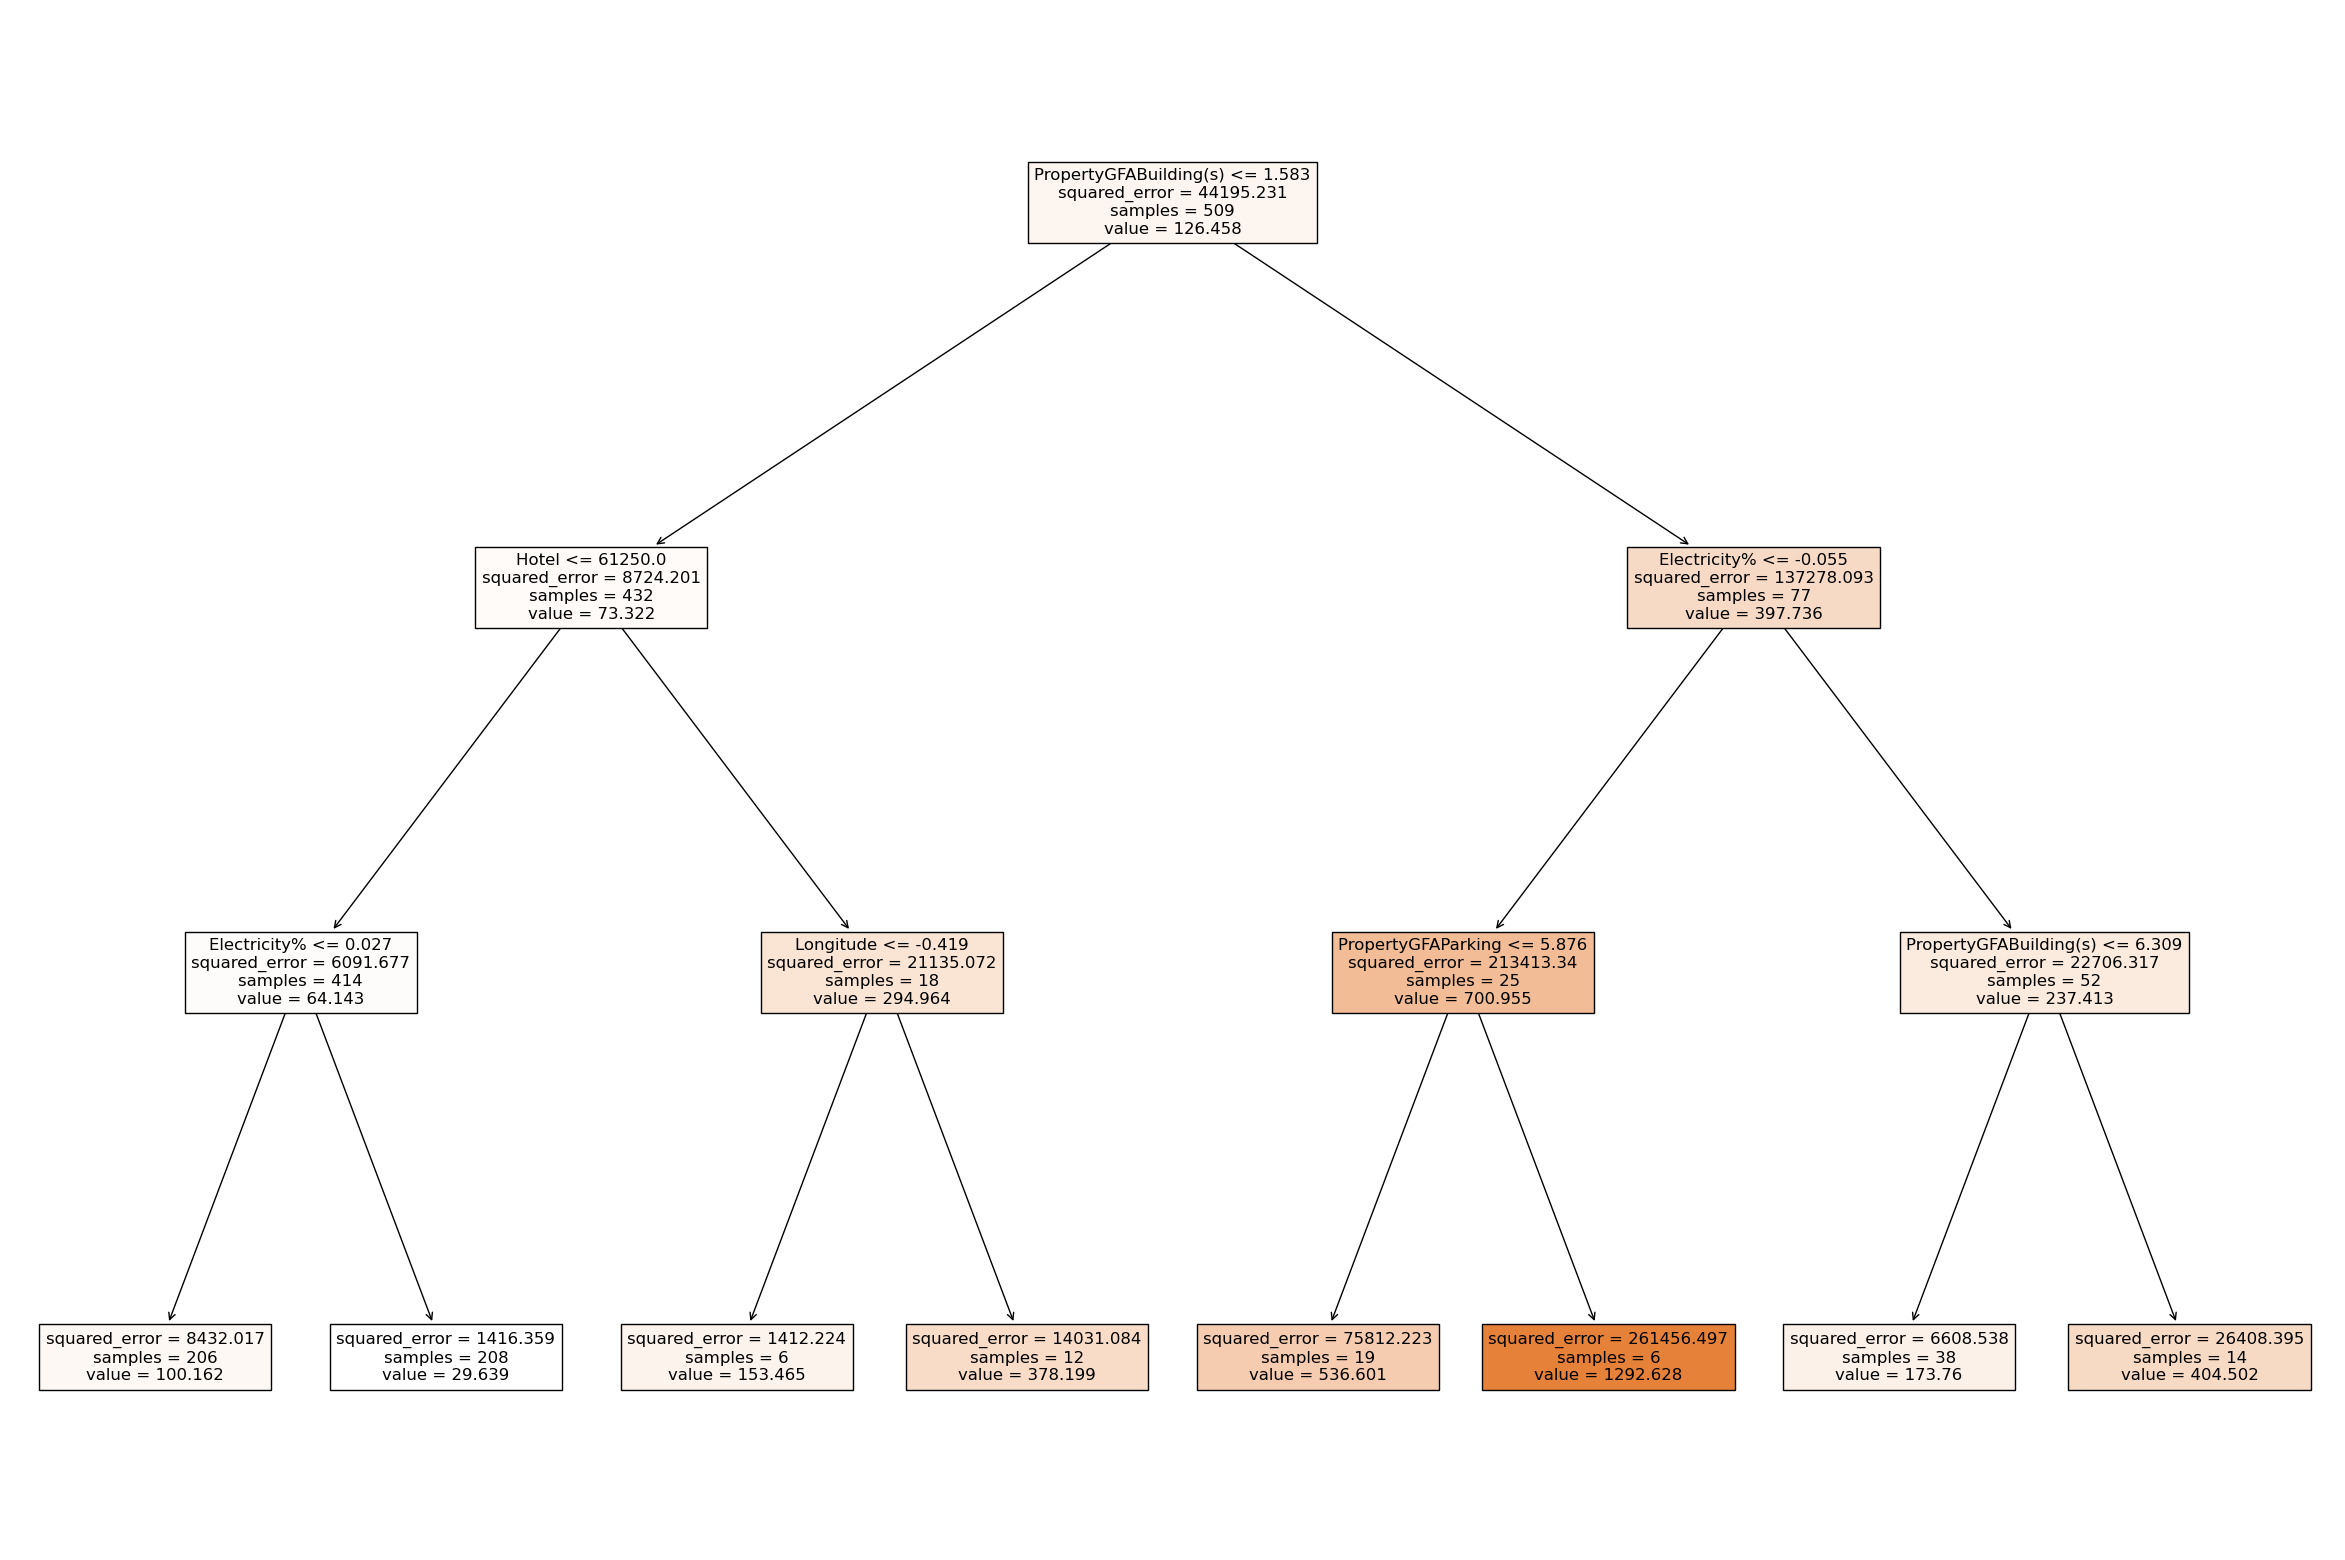

In [121]:
RF_visu = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=random)

# Entraînement du modèle
RF_visu.fit(X_train_EnergyStar_RS, y_train_EnergyStar)

# Prédictions avec le test set
y_pred = RF_visu.predict(X_test_EnergyStar_RS)

# Visualisation avec tree de sklearn
plt.figure(figsize=(30, 20))
vis = tree.plot_tree(RF_visu.estimators_[0], feature_names=X_train_EnergyStar_RS.columns, filled=True)
plt.show()


<a id='Gradient_Boosting_EnergyStar'></a>

#### <span style='background:#4aadd1'>Gradient Boosting Regressor</span>


In [122]:

# Régression Gradient Boosting
# ----------------------------
model_GBR = GradientBoostingRegressor(random_state=random, verbose=False)


In [123]:

# Robust Scaler
# --------------
df_resultats_Emi_EnergyStar, y_pred_EnergyStar = process_regression(model_GBR, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_Emi_EnergyStar,'Gradient_Boosting','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<a id='LightGBM_EnergyStar'></a>

#### <span style='background:#4aadd1'>Light Gradient Boosting Machine</span>


In [124]:

# Régression  LightGBM
# ---------------------
model_lgbm = LGBMRegressor(random_state=random)


In [125]:

# Robust Scaler
# --------------
df_resultats_Emi_EnergyStar, y_pred_EnergyStar = process_regression(model_lgbm, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_Emi_EnergyStar,'Light_GBM','RobustScaler','1er entraînement',
                                                 False, False, False, False)


<a id='bilan_algorithmes_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>**Bilan des algorithmes testés**</span></span>
    

**Tableau de résultats des scores par modèle**

In [126]:

bilan_algo_EnergyStar = df_resultats_Emi_EnergyStar.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_algo_EnergyStar.style.hide(axis="index")


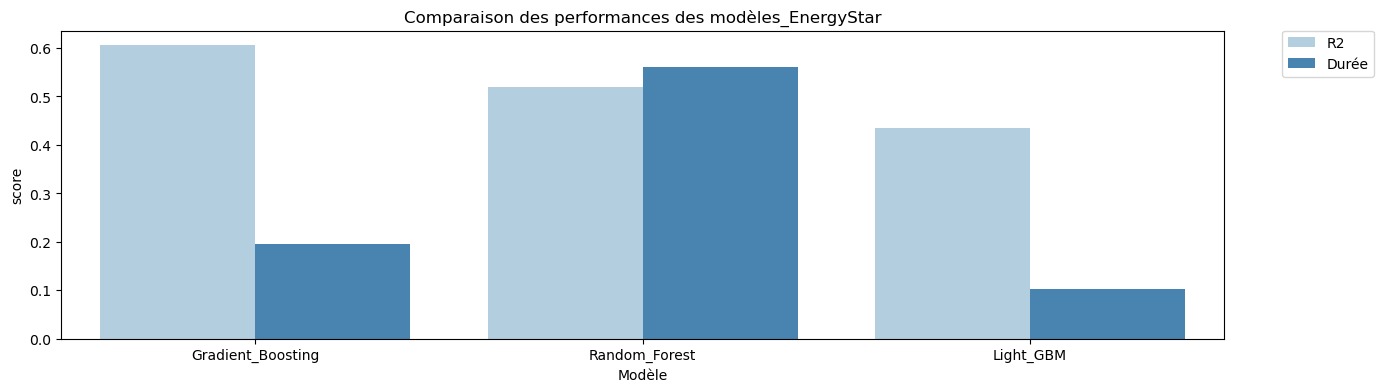

In [127]:

# Comparaison des algorithmes 
df_compar_EnergyStar = bilan_algo_EnergyStar.head(3)

comparaison_EnergyStar_score_melt1 = pd.melt(df_compar_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(15,4))
sns.barplot(x=comparaison_EnergyStar_score_melt1['Modèle'],
            y=comparaison_EnergyStar_score_melt1['score'], hue=comparaison_EnergyStar_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


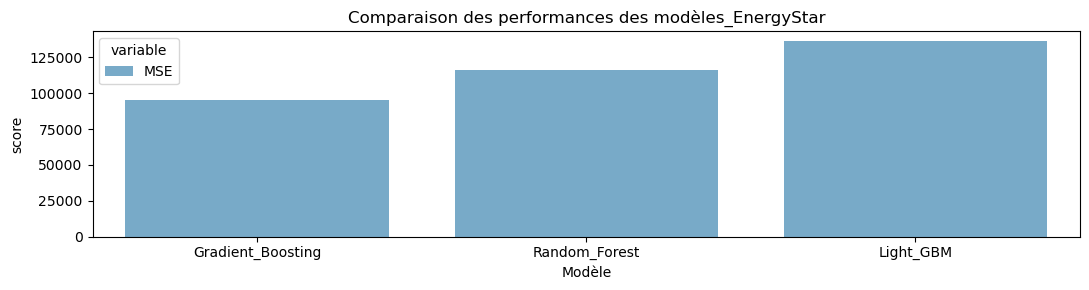

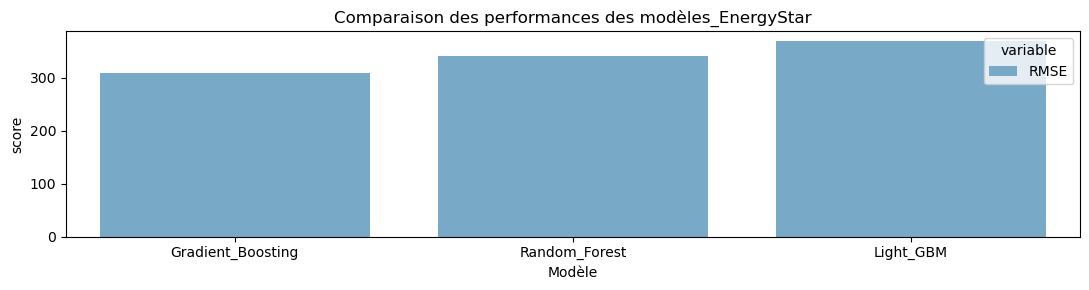

In [128]:

# Comparaison des algorithmes

comparaison_EnergyStar_score_melt2 = pd.melt(df_compar_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_EnergyStar_score_melt3 = pd.melt(df_compar_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_EnergyStar_score_melt2['Modèle'],
            y=comparaison_EnergyStar_score_melt2['score'], hue=comparaison_EnergyStar_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_EnergyStar_score_melt3['Modèle'],
            y=comparaison_EnergyStar_score_melt3['score'], hue=comparaison_EnergyStar_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.tight_layout()  
plt.show()


<a id='opti_algo_EnergyStar'></a>

---
---

## <span style='background:#2a679a'><span style='color:white'> Optimisation algorithmes </span>


In [129]:
# Création d'un dataframe pour enregistrer les résultats 
df_resultats_EnergyStar_opti = pd.DataFrame(dtype='object')

In [130]:

# Création d'un dataframe pour enregistrer les résultats de l'optimissation des algorithmes 
df_resultats_EnergyStar_opti = pd.DataFrame(dtype='object')


<a id='Gradient_Boosting_hyperparam_EnergyStar'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Gradient Boosting Regressor**</span></span>


In [131]:

df_resultats_Emi_EnergyStar.loc[df_resultats_Emi_EnergyStar['Modèle'] == 'Gradient_Boosting']


Modèle        Scaler    Durée       R2   MAE      MSE   RMSE  \
0  Gradient_Boosting  RobustScaler  0.19615  0.60575  80.0  95083.1  308.4   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.980374    0.722439   1179.289475  17937.457791

In [132]:

df_resultats_Emi_EnergyStar, y_pred_EnergyStar = process_regression(model_GBR, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_Emi_EnergyStar,'LinearRegression_Ridge','StandardScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 79.76
 R2: 0.6058 


In [133]:

# Paramètres de base d'un algorithme "Gradient Boosting Regressor"
print("Les paramètres par défaut pour l'algorithme 'Gradient Boosting Regressor':")
pprint(model_GBR.get_params())


Les paramètres par défaut pour l'algorithme 'Gradient Boosting Regressor':
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 84,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [134]:

# Séléction des valeurs des hyperparamètres à tester
GBR_params = {'n_estimators' : [50, 100, 150],
              'learning_rate' : [0.05,0.1, 0.2],
              'max_depth' : [3, 7, None],
              'min_samples_split' : [2, 4]}


In [135]:

#Cross validation des combinaisons des valeurs des differents paramètres

GBR_ES_grid = model_selection.GridSearchCV(model_GBR, GBR_params,
                                        cv =stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

GBR_ES_grid.fit(X_train_EnergyStar_RS, y_train_EnergyStar)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(error_score='raise',
             estimator=GradientBoostingRegressor(random_state=84,
                                                 verbose=False),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 7, None], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

In [136]:

# Best params
best_GBR_ES_params = GBR_ES_grid.best_params_
best_GBR_ES_params


{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [137]:

# Création d'un dataframe pour enregistrer les résultats 
GBR_ES_params_results = pd.DataFrame(dtype='object')

resultize(GBR_ES_grid,GBR_ES_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
38       0.235671      0.001181         0.001645        0.000030   
37       0.156982      0.000797         0.001491        0.000059   

   param_learning_rate param_max_depth param_n_estimators  \
38                 0.2               3                150   
37                 0.2               3                100   

                                               params  mean_test_score  \
38  {'learning_rate': 0.2, 'max_depth': 3, 'min_sa...         0.759683   
37  {'learning_rate': 0.2, 'max_depth': 3, 'min_sa...         0.757549   

    std_test_score  rank_test_score  mean_train_score  std_train_score  
38        0.080092                1          0.995859          0.00028  
37        0.080267                2          0.991414          0.00048

<Figure size 500x500 with 0 Axes>

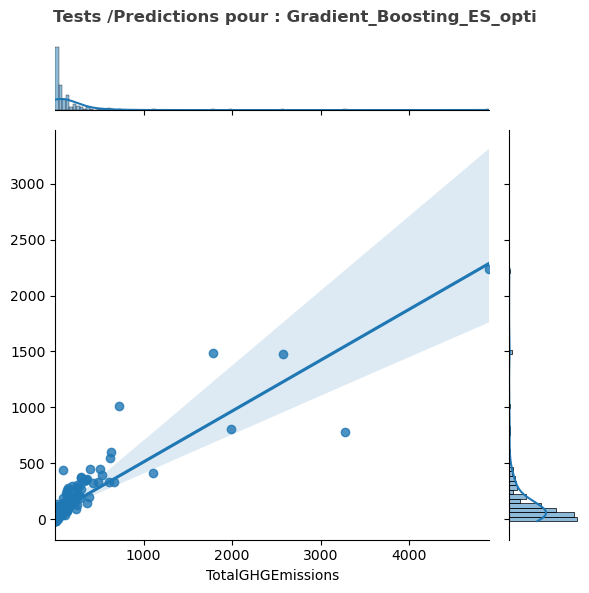

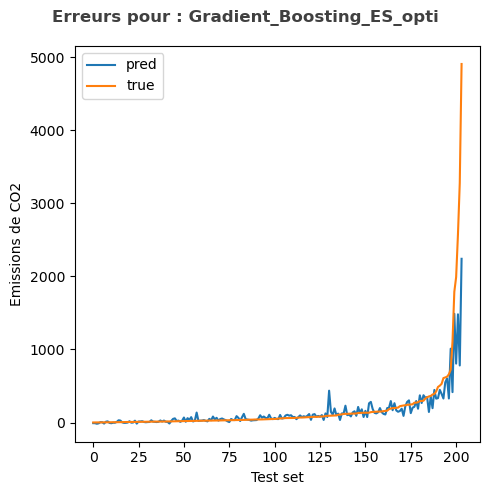

 Performance du modèle : Grid opimisation
 Erreur moy: 75.84
 R2: 0.6482 


In [138]:

model_GBR_ES_opti = GradientBoostingRegressor(**best_GBR_ES_params, random_state=random, verbose=False)

df_resultats_EnergyStar_opti, y_pred_EnergyStar = process_regression(model_GBR_ES_opti, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_EnergyStar_opti,'Gradient_Boosting_ES_opti', 'RobustScaler','Grid opimisation',
                                                         True, True, True, True)


In [139]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_Emi_EnergyStar.loc[((df_resultats_Emi_EnergyStar['Modèle'] =='Gradient_Boosting') & (df_resultats_Emi_EnergyStar['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_EnergyStar_opti.loc[((df_resultats_EnergyStar_opti['Modèle'] =='Gradient_Boosting_ES_opti') & (df_resultats_EnergyStar_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_Emi_EnergyStar.loc[((df_resultats_Emi_EnergyStar['Modèle'] =='Gradient_Boosting') & (df_resultats_Emi_EnergyStar['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_EnergyStar_opti.loc[((df_resultats_EnergyStar_opti['Modèle'] =='Gradient_Boosting_ES_opti') & (df_resultats_EnergyStar_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 7.01%. 
Amélioration de la durée : 51.78%. 


<a id='RF_hyperparam_EnergyStar'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Random Forest Regressor**</span></span>


In [140]:

df_resultats_Emi_EnergyStar.loc[df_resultats_Emi_EnergyStar['Modèle'] == 'Random_Forest']


Modèle        Scaler    Durée       R2   MAE       MSE   RMSE  \
0  Random_Forest  RobustScaler  0.56119  0.51864  83.0  116091.6  340.7   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.946564     0.66916   3248.956359  21877.370871

In [141]:

df_resultats_Emi_EnergyStar, y_pred_EnergyStar = process_regression(model_RF, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_Emi_EnergyStar,'Random_Forest','RobustScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 83.25
 R2: 0.5186 


In [142]:

# Paramètres de base d'un algorithme "Random Forest Regressor"
print("Les paramètres pour l'algorithme 'Random Forest Regressor':")
pprint(model_RF.get_params())


Les paramètres pour l'algorithme 'Random Forest Regressor':
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 84,
 'verbose': 0,
 'warm_start': False}


In [143]:

# Séléction des valeurs des hyperparamètres à tester
RF_ES_params = {'n_estimators' : [50, 100, 150],
             'max_depth': [None, 5,10],
             'min_samples_split': [2,3,5,8,15]             
             }


In [144]:

#Cross validation des combinaisons des valeurs des differents paramètres

RF_ES_grid = model_selection.GridSearchCV(model_RF, RF_ES_params,
                                        cv =stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

RF_ES_grid.fit(X_train_EnergyStar, y_train_EnergyStar)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(error_score='raise',
             estimator=RandomForestRegressor(random_state=84),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 5, 8, 15],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

In [145]:

#
best_RF_ES_params = RF_ES_grid.best_params_
best_RF_ES_params


{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 100}

In [146]:

# Création d'un dataframe pour enregistrer les résultats 
RF_ES_params_results = pd.DataFrame(dtype='object')

resultize(RF_ES_grid,RF_ES_params_results).head(2)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.398625      0.004539         0.008487        0.000074   
3       0.199247      0.002249         0.005063        0.000080   

  param_max_depth param_n_estimators  \
4            None                100   
3            None                 50   

                                              params  mean_test_score  \
4  {'max_depth': None, 'min_samples_split': 3, 'n...         0.671441   
3  {'max_depth': None, 'min_samples_split': 3, 'n...         0.670321   

   std_test_score  rank_test_score  mean_train_score  std_train_score  
4        0.098394                1          0.937715         0.006928  
3        0.102818                2          0.935364         0.008243

In [147]:

model_RF_ES_opti = GradientBoostingRegressor(**best_RF_ES_params, random_state=random, verbose=False)

df_resultats_EnergyStar_opti, y_pred_EnergyStar = process_regression(model_RF_ES_opti, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_EnergyStar_opti,'Random_Forest_ES_opti', 'RobustScaler','Grid opimisation',
                                              False, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 101.60
 R2: 0.4632 


In [148]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_Emi_EnergyStar.loc[((df_resultats_Emi_EnergyStar['Modèle'] =='Random_Forest') & (df_resultats_Emi_EnergyStar['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_EnergyStar_opti.loc[((df_resultats_EnergyStar_opti['Modèle'] =='Random_Forest_ES_opti') & (df_resultats_EnergyStar_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_Emi_EnergyStar.loc[((df_resultats_Emi_EnergyStar['Modèle'] =='Random_Forest') & (df_resultats_Emi_EnergyStar['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_EnergyStar_opti.loc[((df_resultats_EnergyStar_opti['Modèle'] =='Random_Forest_ES_opti') & (df_resultats_EnergyStar_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : -10.68%. 
Amélioration de la durée : 34.21%. 


<a id='LightGBM_hyperparam_EnergyStar'></a>

### <span style='background:#358ab7'><span style='color:white'>**Hyperparamètres Light Gradient Boosting Machine**</span></span>


In [149]:

df_resultats_Emi_EnergyStar.loc[df_resultats_Emi_EnergyStar['Modèle'] == 'Light_GBM']


Modèle        Scaler    Durée       R2   MAE       MSE   RMSE  \
0  Light_GBM  RobustScaler  0.10256  0.43492  91.0  136280.6  369.2   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.884241     0.64342   7032.881024  22912.565437

In [150]:

df_resultats_Emi_EnergyStar, y_pred_EnergyStar = process_regression(model_lgbm, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_Emi_EnergyStar,'Light_GBM','RobustScaler','1er entraînement',
                                               False, False, False,True)


 Performance du modèle : 1er entraînement
 Erreur moy: 91.37
 R2: 0.4349 


In [151]:

# Paramètres de base d'un algorithme "Light Gradient Boosting Machine"
print("Les paramètres pour l'algorithme 'Light Gradient Boosting Machine':")
pprint(model_lgbm.get_params())


Les paramètres pour l'algorithme 'Light Gradient Boosting Machine':
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 84,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [152]:

# Séléction des valeurs des hyperparamètres à tester
lgbm_ES_params = {'n_estimators' : [50, 100, 150],
               'boosting_type': ['gbdt','dart'],
               'colsample_bytree': [0.75,1.0],
               'learning_rate' : [0.05,0.1, 0.2],
               'max_depth' : [-1, 3, 7],
               'n_jobs': [-1,1,4],
               'num_leaves': [15,31,50]
               }


In [153]:

#Cross validation des combinaisons des valeurs des differents paramètres

lgbm_ES_grid = model_selection.GridSearchCV(model_lgbm, lgbm_ES_params,
                                        cv =stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                        return_train_score = True,verbose = 1, error_score='raise')

lgbm_ES_grid.fit(X_train_EnergyStar_RS, y_train_EnergyStar)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(error_score='raise', estimator=LGBMRegressor(random_state=84),
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.75, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [-1, 3, 7],
                         'n_estimators': [50, 100, 150], 'n_jobs': [-1, 1, 4],
                         'num_leaves': [15, 31, 50]},
             return_train_score=True, verbose=1)

In [154]:

#
best_lgbm_ES_params = lgbm_ES_grid.best_params_
best_lgbm_ES_params


{'boosting_type': 'dart',
 'colsample_bytree': 0.75,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 150,
 'n_jobs': -1,
 'num_leaves': 15}

In [155]:
# Création d'un dataframe pour enregistrer les résultats 
lgbm_ES_params_results = pd.DataFrame(dtype='object')

In [156]:
resultize(lgbm_ES_grid,lgbm_ES_params_results).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
700       0.031507      0.001923         0.001132        0.000088   
693       0.030562      0.000545         0.001059        0.000038   

    param_boosting_type param_colsample_bytree param_learning_rate  \
700                dart                   0.75                 0.2   
693                dart                   0.75                 0.2   

    param_max_depth param_n_estimators param_n_jobs param_num_leaves  \
700               3                150            4               31   
693               3                150           -1               15   

                                                params  mean_test_score  \
700  {'boosting_type': 'dart', 'colsample_bytree': ...          0.66756   
693  {'boosting_type': 'dart', 'colsample_bytree': ...          0.66756   

     std_test_score  rank_test_score  mean_train_score  std_train_score  
700        0.052653                1          0.839724         0.011366  
693        0.052653                1          0.839724         0.011366

In [157]:

model_lgbm_ES_opti = LGBMRegressor(**best_lgbm_ES_params, random_state=random)

df_resultats_EnergyStar_opti, y_pred = process_regression(model_lgbm_ES_opti, 
                                               X_train_EnergyStar_RS, X_test_EnergyStar_RS,
                                               y_train_EnergyStar, y_test_EnergyStar,
                                               stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']),
                                               df_resultats_EnergyStar_opti,'Light_GBM_ES_opti', 'RobustScaler','Grid opimisation',
                                              False, False, False, True)


 Performance du modèle : Grid opimisation
 Erreur moy: 91.76
 R2: 0.4451 


In [158]:

# Evaluation amélioration performance
r2_1erTrain = df_resultats_Emi_EnergyStar.loc[((df_resultats_Emi_EnergyStar['Modèle'] =='Light_GBM') & (df_resultats_Emi_EnergyStar['Scaler'] =='RobustScaler')), 'R2'][:1].item()
r2_opti = df_resultats_EnergyStar_opti.loc[((df_resultats_EnergyStar_opti['Modèle'] =='Light_GBM_ES_opti') & (df_resultats_EnergyStar_opti['Scaler'] =='RobustScaler')), 'R2'].item()
amelioration_R2 = round(100* (r2_opti - r2_1erTrain) /r2_1erTrain,2)

duree_1erTrain = df_resultats_Emi_EnergyStar.loc[((df_resultats_Emi_EnergyStar['Modèle'] =='Light_GBM') & (df_resultats_Emi_EnergyStar['Scaler'] =='RobustScaler')), 'Durée'][:1].item()
duree_opti = df_resultats_EnergyStar_opti.loc[((df_resultats_EnergyStar_opti['Modèle'] =='Light_GBM_ES_opti') & (df_resultats_EnergyStar_opti['Scaler'] =='RobustScaler')), 'Durée'].item()
amelioration_duree = round(100* (duree_opti - duree_1erTrain) /duree_1erTrain,2)


print('\033[1m'+'Amélioration du coeff R2 : ' +str(amelioration_R2) +"%. \033[0m")
print('\033[1m'+'Amélioration de la durée : ' +str(amelioration_duree) +"%. \033[0m")


Amélioration du coeff R2 : 2.33%. 
Amélioration de la durée : -56.91%. 


<a id='selec_algo_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>**Sélection du meilleur algorithme pour la estimation desEmissions de CO2**</span></span>    
    

**Tableau de résultats des scores par modèle**

In [159]:

bilan_opti_algo_EnergyStar = df_resultats_EnergyStar_opti.append(df_resultats_dummy_Emi_EnergyStar, ignore_index=True)

bilan_opti_algo_EnergyStar = bilan_opti_algo_EnergyStar.sort_values(by=['MSE', 'Durée', 'R2'])
bilan_opti_algo_EnergyStar.style.hide(axis="index")

bilan_opti_algo_EnergyStar


Modèle        Scaler    Durée       R2    MAE       MSE  \
0  Gradient_Boosting_ES_opti  RobustScaler  0.29772  0.64820   76.0   84844.3   
1      Random_Forest_ES_opti  RobustScaler  0.75315  0.46325  102.0  129447.9   
2          Light_GBM_ES_opti  RobustScaler  0.04419  0.44507   92.0  133833.6   
3         DummyRegressorMean  RobustScaler  0.00053 -0.00879  176.0  243292.8   

    RMSE  CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0  291.3     0.995859    0.759683    250.274396  14822.050177  
1  359.8     1.000000    0.628870      0.000049  20317.443507  
2  365.8     0.839724    0.667560   9742.010242  21381.488869  
3  493.2     0.000000   -0.008111  60627.982419  60803.469355

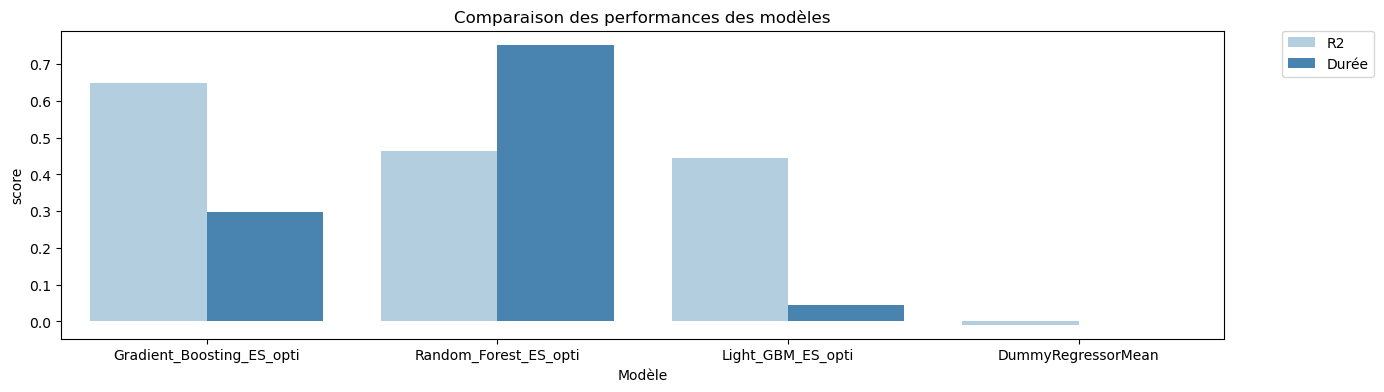

In [160]:

# Comparaison des algorithmes optimisés

comparaison_opti_EnergyStar_score_melt1 = pd.melt(bilan_opti_algo_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(15,4))
sns.barplot(x=comparaison_opti_EnergyStar_score_melt1['Modèle'],
            y=comparaison_opti_EnergyStar_score_melt1['score'], hue=comparaison_opti_EnergyStar_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


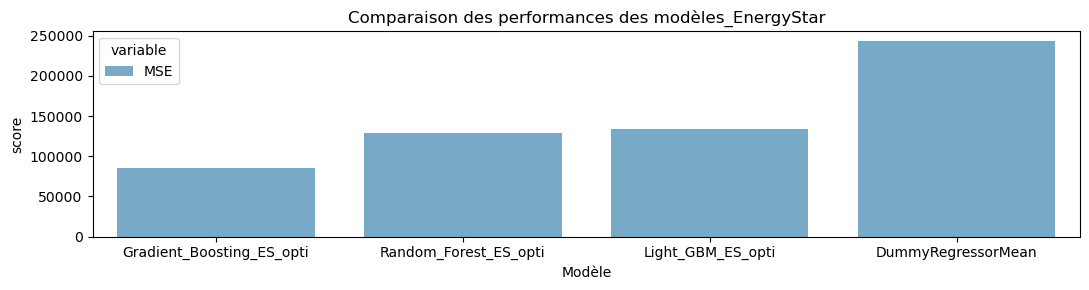

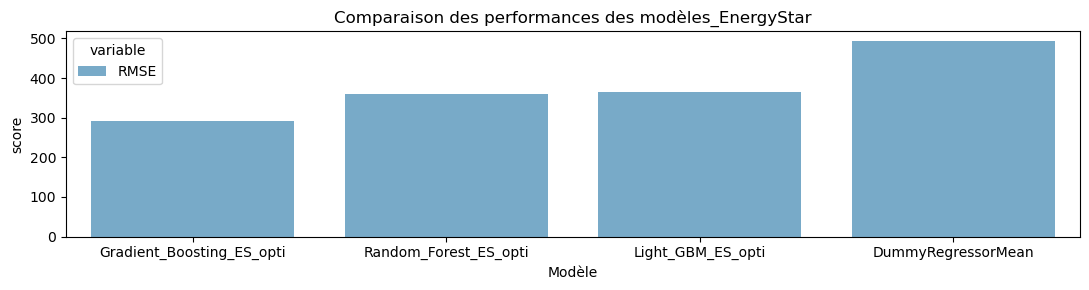

In [161]:

# Comparaison des 4 algorithmes les plus performants

comparaison_opti_EnergyStar_score_melt2 = pd.melt(bilan_opti_algo_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
comparaison_opti_EnergyStar_score_melt3 = pd.melt(bilan_opti_algo_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_opti_EnergyStar_score_melt2['Modèle'],
            y=comparaison_opti_EnergyStar_score_melt2['score'], hue=comparaison_opti_EnergyStar_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(11,3))
sns.barplot(x=comparaison_opti_EnergyStar_score_melt3['Modèle'],
            y=comparaison_opti_EnergyStar_score_melt3['score'], hue=comparaison_opti_EnergyStar_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.tight_layout()  
plt.show()


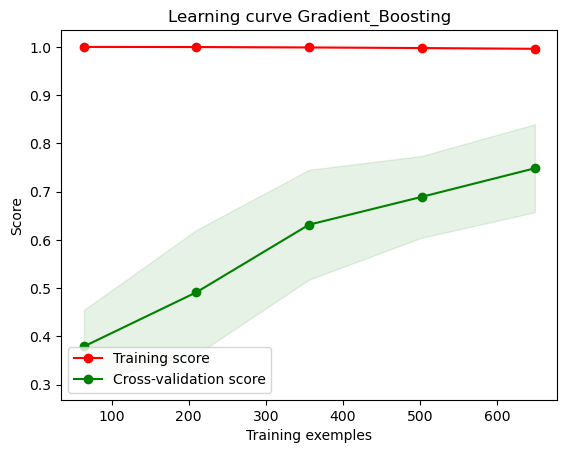

In [162]:

# Gradient_Boosting  Learning curve
plot_learning_curve(model_GBR_ES_opti, 'Learning curve Gradient_Boosting', X_train_EnergyStar_RS, y_train_EnergyStar, cv = stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']))


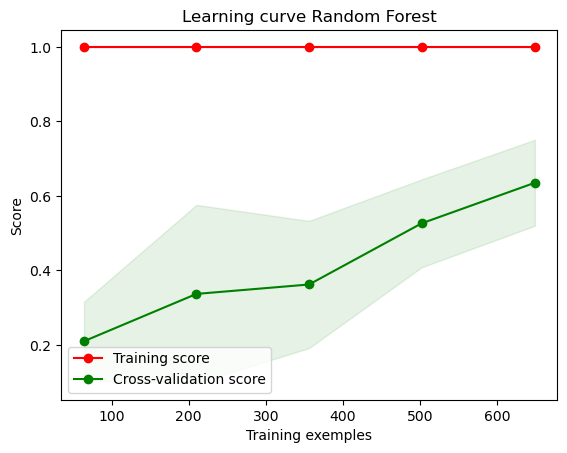

In [163]:

# Random_Forest_opti Learning curve
plot_learning_curve(model_RF_ES_opti, 'Learning curve Random Forest', X_train_EnergyStar_RS, y_train_EnergyStar, cv = stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']))


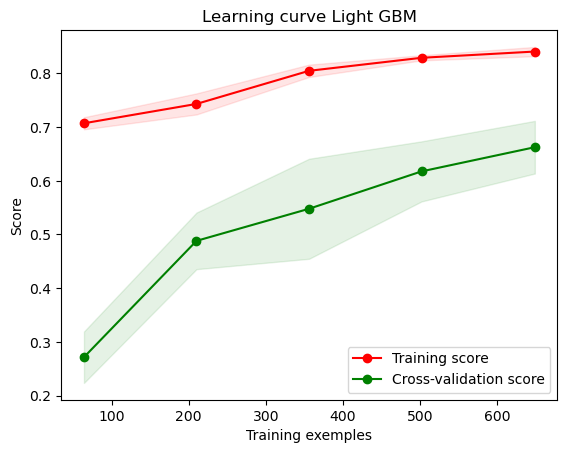

In [164]:

# Light GB Learning curve
plot_learning_curve(model_lgbm_ES_opti, 'Learning curve Light GBM', X_train_EnergyStar_RS, y_train_EnergyStar, cv = stratified_cv(X_train_EnergyStar, strat_train_set_EnergyStar['TotalGHGEmissions_cat']))


<a id='pred_final_EnergyStar'></a>

---
---

## <span style='background:#2a679a'><span style='color:white'> **Prédictions émissions CO2, avec Energy Star Score, du modèle final** </span>



In [165]:

#---------------------------------------------------------------------------------------
# Chargement des jeux de données  utiles pour la comprehension des erreurs de prédiction
#---------------------------------------------------------------------------------------
source_BEB_2016 = pd.read_csv('/home/raquelsp/Documents/Openclassrooms/P4_Seattle_buildings/P4_travail/P4_data/P4_source/2016_Building_Energy_Benchmarking.csv', low_memory=False,encoding='utf-8')
index_BEB_2016 = pd.read_csv('index_BEB_2016.csv', sep='\t', low_memory=False,encoding='utf-8')


In [166]:

model_GBR_ES_opti.fit(X_train_EnergyStar_RS, y_train_EnergyStar)

# Predictions avec le train set
y_train_EnergyStar_pred = model_GBR_ES_opti.predict(X_train_EnergyStar_RS)

# Predictions avec le test set
y_test_EnergyStar_pred = model_GBR_ES_opti.predict(X_test_EnergyStar_RS)


<a id='features_importance_EnergyStar'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Importance des variables pour la estimation des emissions de CO2, avec Energy Star Score </span>
    

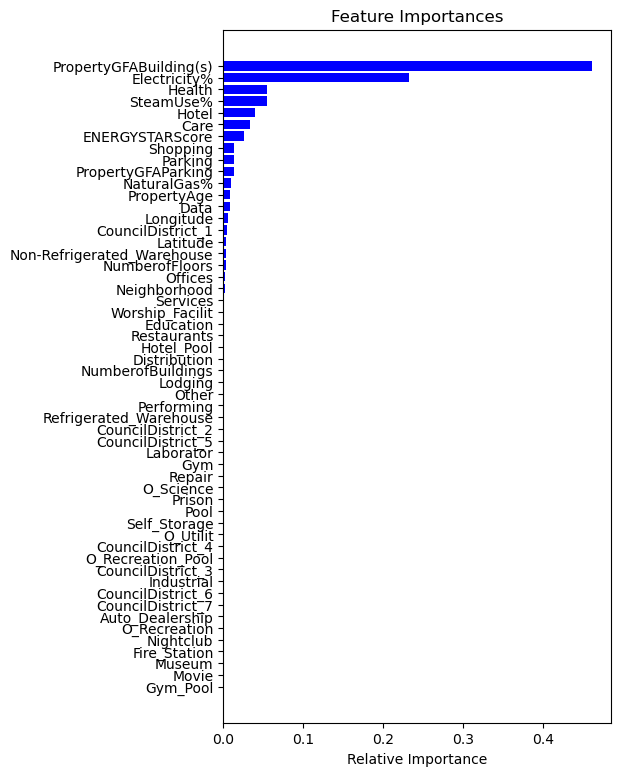

In [167]:

importances = model_GBR_ES_opti.feature_importances_
indices = np.argsort(importances)
features = X_train_EnergyStar_RS.columns

plt.figure(figsize=(5,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()




In [168]:

# Création du 'Explainer' en considerant la rélation entre les variables
#GBR_ridge_explainer = shap.KernelExplainer(model_GBR_opti, X_train_RS)

GBRopti_ES_expl = shap.TreeExplainer(model_GBR_ES_opti,X_test_EnergyStar_RS)


In [169]:

# Préparation des paramètres pour les représentations graphiques

shap_values_exp_ES = GBRopti_ES_expl.shap_values(X_test_EnergyStar_RS)
featureNames = model_Emi_EnergyStar_BEB_2016.drop(columns=['TotalGHGEmissions','TotalGHGEmissions_cat'], axis=1).columns.tolist()
maxDisp = len(featureNames)


In [170]:

# Importance des variables global
valeurs= np.abs(shap_values_exp_ES).mean(0)
global_feature_importance_EnergyStar = pd.DataFrame(list(zip(X_test_EnergyStar_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
global_feature_importance_EnergyStar.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
global_feature_importance_EnergyStar = global_feature_importance_EnergyStar.reset_index(drop=True)


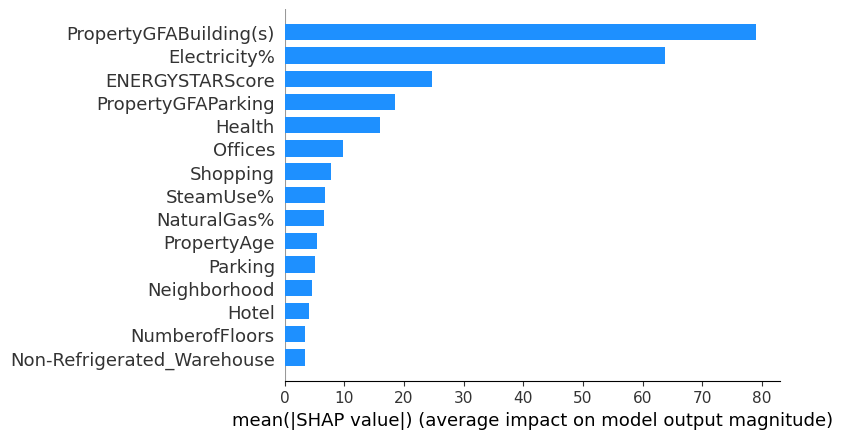

In [171]:

shap.summary_plot(shap_values_exp_ES, max_display=15, plot_type="bar",feature_names=featureNames, color="dodgerblue", plot_size = 0.2)


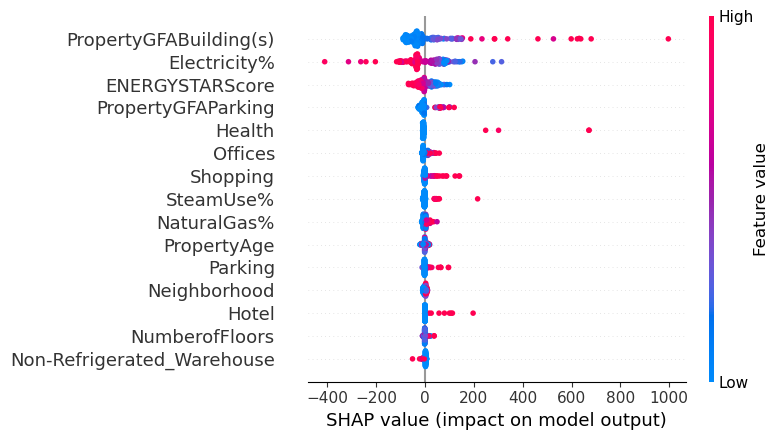

In [172]:

shap.summary_plot(shap_values_exp_ES,X_test_EnergyStar_RS, max_display=15,feature_names=featureNames, plot_size = 0.2)


In [173]:

shap.plots.force(GBRopti_ES_expl.expected_value, shap_values_exp_ES, feature_names=featureNames, out_names="Emissions de CO2")


<a id='pred_errors_EnergyStar'></a>

---

## <span style='background:#2a679a'><span style='color:white'> Erreurs de prédiction des émissions de CO2 avec Energy Star Score</span>



<span style='color:#67d1e9'>**Erreurs sur le train set**</span>


In [174]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_train_EnergyStar = pd.DataFrame({'y_train_pred': y_train_EnergyStar_pred, 'y_train': y_train_EnergyStar})
df_error_train_EnergyStar['erreur_abs'] = abs(y_train_EnergyStar_pred - y_train_EnergyStar)


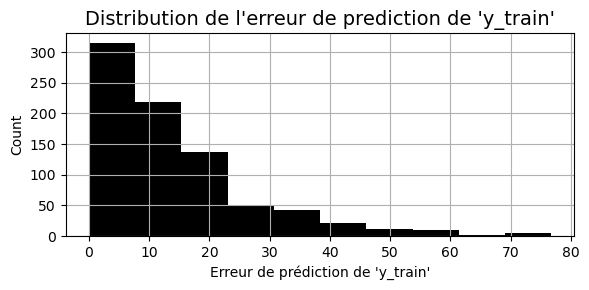

In [175]:

# Répresentation graphique de l'erreur absolut de predction du set de entraînement
df_error_train_EnergyStar['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_train'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_train'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()



<span style='color:#67d1e9'>**Erreurs sur le test set**</span>


In [176]:

#--------------------------
# Tableaux avec les erreurs
#--------------------------

df_error_test_EnergyStar = pd.DataFrame({'y_test_pred': y_test_EnergyStar_pred, 'y_test': y_test_EnergyStar})
df_error_test_EnergyStar['erreur_abs'] = abs(y_test_EnergyStar_pred - y_test_EnergyStar)


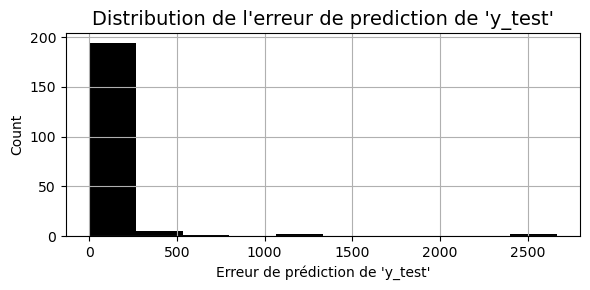

In [177]:

# Répresentation graphique de l'erreur absolut de predction du set de test
df_error_test_EnergyStar['erreur_abs'].hist(bins = 10, figsize = (6,3), color = 'black')
plt.title("Distribution de l'erreur de prediction de 'y_test'", fontsize=14)
plt.xlabel("Erreur de prédiction de 'y_test'")
plt.ylabel('Count')
plt.tight_layout() 
plt.show()


In [178]:
df_error_test_EnergyStar['erreur_abs'].describe()

count     204.000000
mean       75.835198
std       281.927249
min         0.040838
25%         7.929740
50%        17.357162
75%        46.498086
max      2665.526890
Name: erreur_abs, dtype: float64

<a id='min_max_error_EnergyStar'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur maximale et minimale sur le jeu de test, des émissions de CO2 avec Energy Star Score**</span></span>

In [179]:
# Erreur maximale
df_error_EnergyStar_max = df_error_test_EnergyStar[df_error_test_EnergyStar['erreur_abs'] == df_error_test_EnergyStar['erreur_abs'].max()]
df_error_EnergyStar_max


y_test_pred   y_test  erreur_abs
76   2240.80311  4906.33  2665.52689

In [180]:

# Obtention des les informations concernant la propriété associée à l'erreur
print("La propriétée avec l'erreur de prédiction maximale est : \n")

prop_max_error_EnergyStar = index_BEB_2016.iloc[df_error_EnergyStar_max.index.to_list(), :]
OSEBuildingID_prop_max_error_EnergyStar = prop_max_error_EnergyStar['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_max_error_EnergyStar[0]]


La propriétée avec l'erreur de prédiction maximale est : 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType PropertyName  \
89            131      2016  NonResidential               Other     Lakeview   

            Address     City State  ZipCode TaxParcelIdentificationNumber  \
89  1208 NE 64th st  Seattle    WA  98115.0                    1797500625   

    CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
89                    4    NORTHEAST  47.67524 -122.31534       1941   

    NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
89                1.0               4             56521                   0   

    PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
89                   56521                     Other                  Other   

    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
89                    49000.0                          NaN   

    SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
89                              NaN                         NaN   

    ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
89                             NaN                      NaN              NaN   

    SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
89        129.699997          129.899994          407.399994   

    SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
89                 408.0            6357632.0              6367210.0   

    SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
89             0.0       1863315.125          6357631.0                 0.0   

    NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
89               0.0        False       NaN        Compliant     NaN   

    TotalGHGEmissions  GHGEmissionsIntensity  
89              44.32                   0.78

In [181]:
# Erreur minimale
df_error_EnergyStar_min = df_error_test_EnergyStar[df_error_test_EnergyStar['erreur_abs'] == df_error_test_EnergyStar['erreur_abs'].min()]
df_error_EnergyStar_min


y_test_pred  y_test  erreur_abs
492    13.119162   13.16    0.040838

In [182]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("La propriétée avec l'erreur de prédiction minimale est : \n")

prop_min_error_EnergyStar = index_BEB_2016.iloc[df_error_EnergyStar_min.index.to_list(), :]
OSEBuildingID_prop_min_error_EnergyStar = prop_min_error_EnergyStar['OSEBuildingID'].tolist()
source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'] == OSEBuildingID_prop_min_error_EnergyStar[0]]


La propriétée avec l'erreur de prédiction minimale est : 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
555            750      2016  NonResidential        Large Office   

                                 PropertyName         Address     City State  \
555  Children's Hospital Research Building #2  1915 Terry Ave  Seattle    WA   

     ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
555  98101.0                    0660001255                    7     DOWNTOWN   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
555  47.61628 -122.33391       1953                1.0               7   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
555            274362                   0                  274362   

    ListOfAllPropertyUseTypes LargestPropertyUseType  \
555                    Office                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
555                   274362.0                          NaN   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
555                              NaN                         NaN   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
555                             NaN                     2016             82.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
555         60.299999           60.400002          183.899994   

     SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
555            184.100006           16540550.0             16572684.0   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
555             0.0         4641282.0         15836054.0         7044.939453   

     NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  \
555          704494.0        False       NaN        Compliant     NaN   

     TotalGHGEmissions  GHGEmissionsIntensity  
555             147.82                   0.54

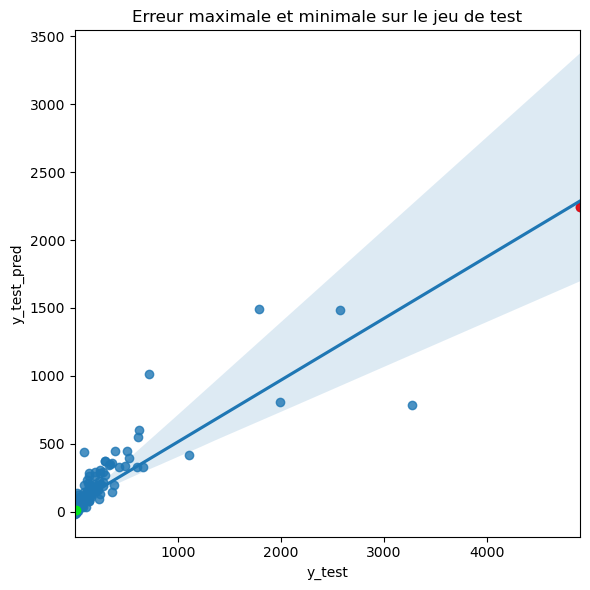

In [183]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(6,6))

sns.regplot(data = df_error_test_EnergyStar, x='y_test', y='y_test_pred')
sns.regplot(data = df_error_EnergyStar_max, x=df_error_EnergyStar_max['y_test'], y=df_error_EnergyStar_max['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_error_EnergyStar_min, x=df_error_EnergyStar_min['y_test'], y=df_error_EnergyStar_min['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur maximale et minimale sur le jeu de test')
    
plt.tight_layout() 
plt.show()


In [184]:
# Position de l'éntrée associée au erreur maximal dans le test set
X_test_EnergyStar_item = [i for i,index in enumerate(X_test_EnergyStar_RS.index.tolist()) if index == df_error_EnergyStar_max.index]

# Importance des variables erreur max
valeurs= np.abs(shap_values_exp_ES[X_test_EnergyStar_item]).mean(0)
error_max_feature_importance_EnergyStar = pd.DataFrame(list(zip(X_test_EnergyStar_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_max_feature_importance_EnergyStar.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_max_feature_importance_EnergyStar = error_max_feature_importance_EnergyStar.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur maximale
shap.plots.force(GBRopti_ES_expl.expected_value, shap_values_exp_ES[X_test_EnergyStar_item], feature_names=featureNames, out_names="Emissions de CO2")


In [185]:
# Position de l'éntrée associée au erreur minimale dans le test set
X_test_EnergyStar_item = [i for i,index in enumerate(X_test_EnergyStar_RS.index.tolist()) if index == df_error_EnergyStar_min.index]

# Importance des variables erreur min
valeurs= np.abs(shap_values_exp_ES[X_test_EnergyStar_item]).mean(0)
error_min_feature_importance_EnergyStar = pd.DataFrame(list(zip(X_test_EnergyStar_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_min_feature_importance_EnergyStar.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_min_feature_importance_EnergyStar =error_min_feature_importance_EnergyStar.reset_index(drop=True)

# Contribution des variables en la prédiction de la valeur associée à l'erreur minimale
shap.plots.force(GBRopti_ES_expl.expected_value, shap_values_exp_ES[X_test_EnergyStar_item], feature_names=featureNames, out_names="Emissions de CO2")


<a id='erreur_sup95_EnergyStar'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 supérieur à celui du 95% des prédictions restantes, des émissions de CO2 avec Energy Star Score**</span></span>

In [186]:

#  erreur sur le jeu de test de plus de 95%
df_erreur_sup95_EnergyStar = df_error_test_EnergyStar[df_error_test_EnergyStar['erreur_abs']> df_error_test_EnergyStar['erreur_abs'].quantile(0.95)]
df_erreur_sup95_EnergyStar=df_erreur_sup95_EnergyStar.sort_values(by=['erreur_abs'], ascending=[False])


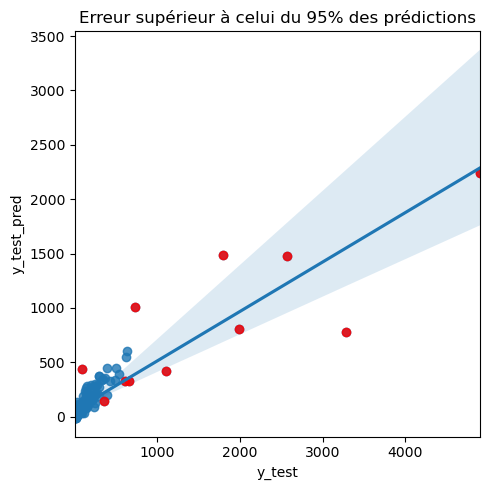

In [187]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test_EnergyStar, x=y_test_EnergyStar, y=y_test_EnergyStar_pred)
sns.regplot(data = df_erreur_sup95_EnergyStar, x=df_erreur_sup95_EnergyStar['y_test'], y=df_erreur_sup95_EnergyStar['y_test_pred'], color ='red', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur supérieur à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [188]:

# Obtention des les informations concernant les propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

print("Il y a " + str(df_erreur_sup95_EnergyStar.shape[0]) + " propriétées dont l'erreur de prédiction de leur emission de CO2 est supérieur à celui du 95% des prédictions restantes. Il s'agit de: \n")

prop_95_error_EnergyStar = index_BEB_2016.iloc[df_erreur_sup95_EnergyStar.index.to_list(), :]
OSEBuildingID_prop_95_error_EnergyStar = prop_95_error_EnergyStar['OSEBuildingID'].tolist()
#source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_95_error_EnergyStar)]


Il y a 11 propriétées dont l'erreur de prédiction de leur emission de CO2 est supérieur à celui du 95% des prédictions restantes. Il s'agit de: 



In [189]:

# Position des propriétés avec un erreur associé supérieur à celui du 95% des prédictions restantes

# Liste des indices concernées 
erreur_sup95_EnergyStar_idx_list = df_erreur_sup95_EnergyStar.index.tolist()
X_test_EnergyStar_RS_idx = X_test_EnergyStar_RS.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_EnergyStar_items = [i for i in range(len(X_test_EnergyStar_RS_idx)) if X_test_EnergyStar_RS_idx[i] in erreur_sup95_EnergyStar_idx_list]


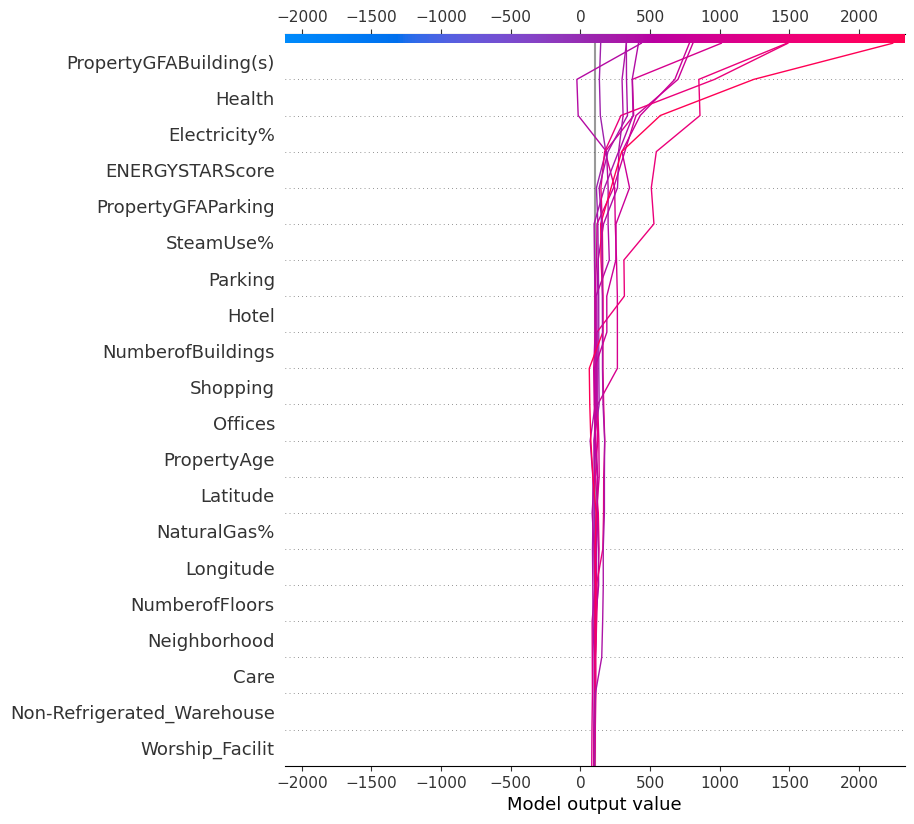

In [190]:

# Importance des variables error_sup95
valeurs= np.abs(shap_values_exp_ES[X_test_EnergyStar_items]).mean(0)
error_sup95_feature_importance_EnergyStar = pd.DataFrame(list(zip(X_test_EnergyStar_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
error_sup95_feature_importance_EnergyStar.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
error_sup95_feature_importance_EnergyStar =error_sup95_feature_importance_EnergyStar.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_ES_expl.expected_value, GBRopti_ES_expl.shap_values(X_test_EnergyStar_RS.iloc[X_test_EnergyStar_items]), feature_names=featureNames)


<a id='erreur_inf5_EnergyStar'></a>

### <span style='background:#358ab7'><span style='color:white'>**Erreur de prédiction des emissions de CO2 inférieur à celui du 95% des prédictions restantes, des émissions de CO2 avec Energy Star Score**</span></span>


In [191]:

#  erreur sur le jeu de test de moins de 1%
df_erreur_inf5_EnergyStar = df_error_test_EnergyStar[df_error_test_EnergyStar['erreur_abs'] < df_error_test_EnergyStar['erreur_abs'].quantile(0.05)]


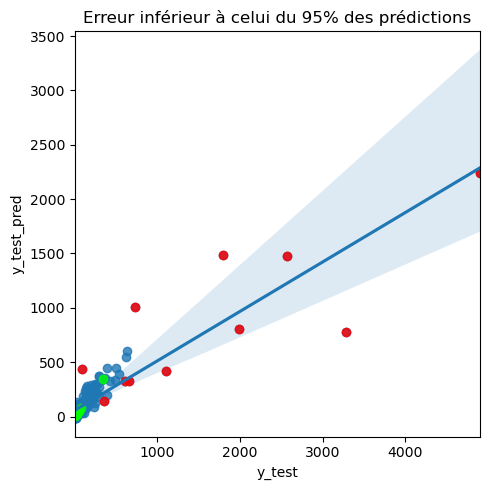

In [192]:

# Visualisation des prédictions / valeurs réélles du jeu d'entraînement
fig = plt.figure(figsize=(5,5))

sns.regplot(data = df_error_test_EnergyStar, x='y_test', y='y_test_pred')
sns.regplot(data = df_erreur_sup95_EnergyStar, x=df_erreur_sup95_EnergyStar['y_test'], y=df_erreur_sup95_EnergyStar['y_test_pred'], color ='red', fit_reg=False)
sns.regplot(data = df_erreur_inf5_EnergyStar, x=df_erreur_inf5_EnergyStar['y_test'], y=df_erreur_inf5_EnergyStar['y_test_pred'], color ='lime', fit_reg=False)

plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Erreur inférieur à celui du 95% des prédictions')
    
plt.tight_layout() 
plt.show()


In [193]:

# Obtention des les informations concernant les propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
print("Il y a " + str(df_erreur_inf5_EnergyStar.shape[0]) + " propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: \n")

prop_inf95_error_EnergyStar = index_BEB_2016.iloc[df_erreur_inf5_EnergyStar.index.to_list(), :]
OSEBuildingID_prop_inf95_error_EnergyStar = prop_inf95_error_EnergyStar['OSEBuildingID'].tolist()
#source_BEB_2016.loc[source_BEB_2016['OSEBuildingID'].isin(OSEBuildingID_prop_inf95_error_EnergyStar)]


Il y a 11 propriétées dont l'erreur de prédiction de leurs emissions de CO2 est inférieur à celui du 90% des prédictions restantes. Il s'agit de: 



In [194]:

# Position des propriétés avec un erreur associé inférieur à celui du 99% des prédictions restantes
# Liste des indices concernées 
erreur_inf95_EnergyStar_idx_list = df_erreur_inf5_EnergyStar.index.tolist()

# Position des propriétés_erreur_sup99 dans le test set
X_test_EnergyStar_items = [i for i in range(len(X_test_EnergyStar_RS_idx)) if X_test_EnergyStar_RS_idx[i] in erreur_inf95_EnergyStar_idx_list]


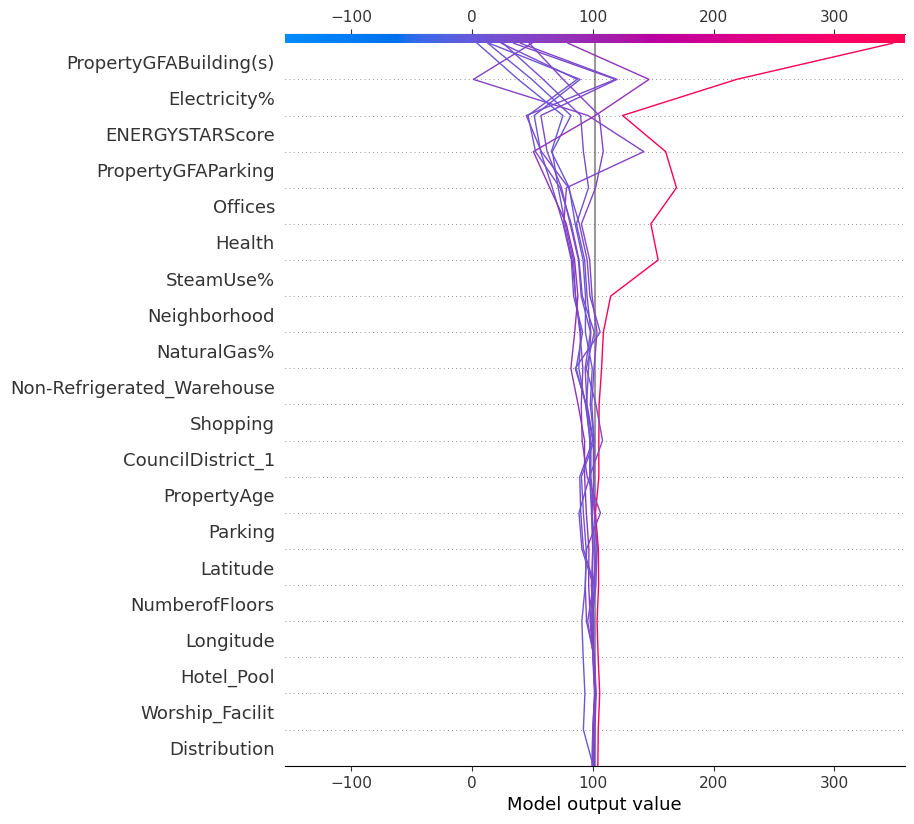

In [195]:

# Importance des variables erreur_inf99
valeurs= np.abs(shap_values_exp_ES[X_test_EnergyStar_items]).mean(0)
erreur_inf95_feature_importance_EnergyStar = pd.DataFrame(list(zip(X_train_EnergyStar_RS.columns,valeurs)),columns=['Variable','feature_importance_valeurs'])
erreur_inf95_feature_importance_EnergyStar.sort_values(by=['feature_importance_valeurs'],ascending=False,inplace=True)
erreur_inf95_feature_importance_EnergyStar =erreur_inf95_feature_importance_EnergyStar.reset_index(drop=True)

# Chemin de décision suivi par l'application, une par une, des valeurs shaple des variables individuelles à la valeur à prédire
# afin de générer la valeur prédite sous forme de graphique linéaire
shap.decision_plot(GBRopti_ES_expl.expected_value, GBRopti_ES_expl.shap_values(X_test_EnergyStar_RS.iloc[X_test_EnergyStar_items]), feature_names=featureNames)


<a id='errors_feature_importance_EnergyStar'></a>

---

### <span style='background:#358ab7'><span style='color:white'>**Importance des variables associées aux erreurs plus/moins importants, des émissions de CO2 avec Energy Star Score**</span></span>
    


In [196]:

#----------------------------------------------------------
#Tableau synthèse differences en l'importance des variables
#----------------------------------------------------------

global_feature_imp_cls_EnergyStar = global_feature_importance_EnergyStar.reset_index().copy()
global_feature_imp_cls_EnergyStar = global_feature_imp_cls_EnergyStar.rename(columns={"index": "Global"}).drop(columns='feature_importance_valeurs').head(10)
global_feature_imp_cls_EnergyStar["Global"] = global_feature_imp_cls_EnergyStar["Global"]+1

error_max_feature_imp_cls_EnergyStar = error_max_feature_importance_EnergyStar.reset_index().copy()
error_max_feature_imp_cls_EnergyStar = error_max_feature_imp_cls_EnergyStar.rename(columns={"index": "ErreurMax"}).drop(columns='feature_importance_valeurs').head(10)
error_max_feature_imp_cls_EnergyStar["ErreurMax"] = error_max_feature_imp_cls_EnergyStar["ErreurMax"]+1

error_min_feature_imp_cls_EnergyStar = error_min_feature_importance_EnergyStar.reset_index().copy()
error_min_feature_imp_cls_EnergyStar = error_min_feature_imp_cls_EnergyStar.rename(columns={"index": "ErreurMin"}).drop(columns='feature_importance_valeurs').head(10)
error_min_feature_imp_cls_EnergyStar["ErreurMin"] = error_min_feature_imp_cls_EnergyStar["ErreurMin"]+1

error_sup95_feature_imp_cls_EnergyStar = error_sup95_feature_importance_EnergyStar.reset_index().copy()
error_sup95_feature_imp_cls_EnergyStar = error_sup95_feature_imp_cls_EnergyStar.rename(columns={"index": "Error_sup95"}).drop(columns='feature_importance_valeurs').head(10)
error_sup95_feature_imp_cls_EnergyStar["Error_sup95"] = error_sup95_feature_imp_cls_EnergyStar["Error_sup95"]+1

erreur_inf95_feature_imp_cls_EnergyStar = erreur_inf95_feature_importance_EnergyStar.reset_index().copy()
erreur_inf95_feature_imp_cls_EnergyStar = erreur_inf95_feature_imp_cls_EnergyStar.rename(columns={"index": "Error_inf95"}).drop(columns='feature_importance_valeurs').head(10)
erreur_inf95_feature_imp_cls_EnergyStar["Error_inf95"] = erreur_inf95_feature_imp_cls_EnergyStar["Error_inf95"]+1

df_EnergyStar_features_importance_classement = reduce(lambda x,y: pd.merge(x,y, on='Variable', how='outer'),[error_max_feature_imp_cls_EnergyStar, error_sup95_feature_imp_cls_EnergyStar,\
                                                                                                  global_feature_imp_cls_EnergyStar,\
                                                                                                  erreur_inf95_feature_imp_cls_EnergyStar ,error_min_feature_imp_cls_EnergyStar])

context = df_EnergyStar_features_importance_classement.columns.tolist()
context.remove('Variable')


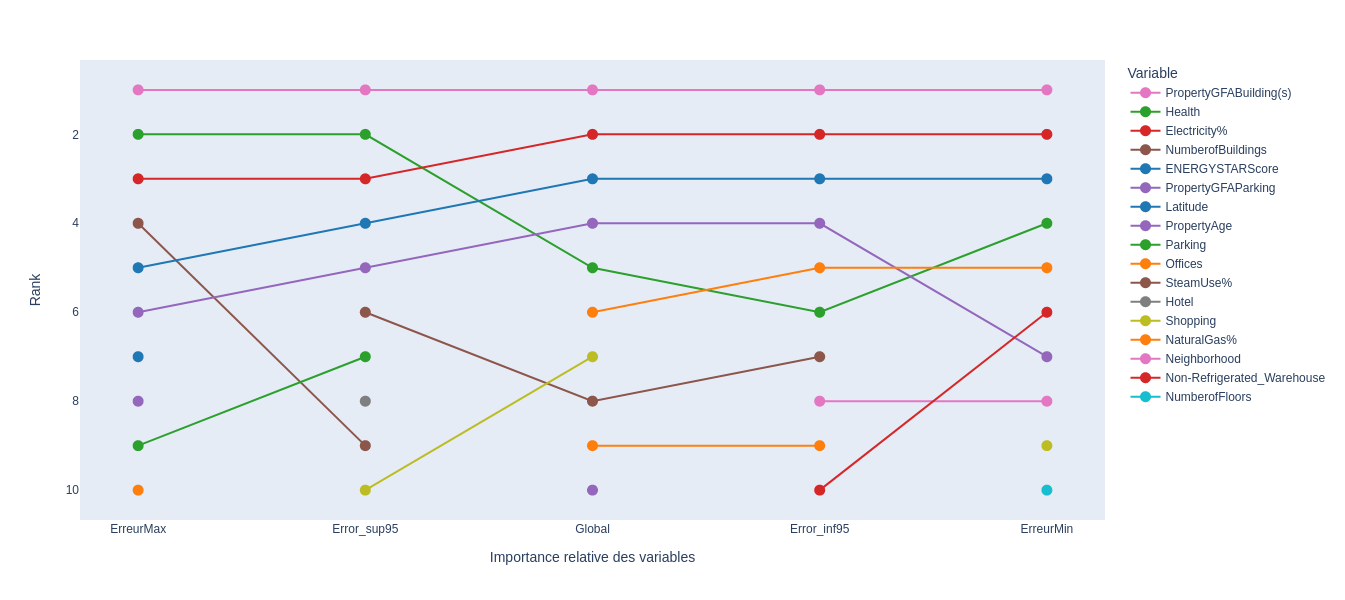

In [197]:

#----------------------------------------------
#Visualisation de l'évolution de l'attractivité
#----------------------------------------------

##
#Data
##
df_EnergyStar_featImport_classement = pd.melt(frame = df_EnergyStar_features_importance_classement, id_vars=["Variable"], value_vars = (context),\
                                   var_name="context", value_name="Importance")  
df_EnergyStar_featImport_classement.head()


##
#Graph
##

#extract color palette, the palette can be changed
list_variables = list(set(df_EnergyStar_featImport_classement['Variable']))
pal = list(sns.color_palette(n_colors=len(list_variables)).as_hex())
dict_color = dict(zip(list_variables, pal))

fig = px.line(df_EnergyStar_featImport_classement, x = 'context', y = 'Importance',color = 'Variable', color_discrete_map= dict_color, markers=True, width=1000, height=600)
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(autorange='reversed', title='Rank',visible=True, showticklabels=True)
fig.update_xaxes(title='Importance relative des variables', visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),yaxis=dict(showgrid=False) )

fig.show()


<a id='eval_energy_score'></a>

---
---

# <span style='background:#26467a'><span style='color:white'>**Évaluation de l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions** </span></span>



In [198]:

df_CO2 = df_resultats_opti.loc[df_resultats_opti["Modèle"] == 'Gradient_Boosting_opti' ]
df_CO2_EnergyStar = df_resultats_EnergyStar_opti.loc[df_resultats_EnergyStar_opti["Modèle"] == 'Gradient_Boosting_ES_opti' ]

eval_EnergyStar = df_CO2.append(df_CO2_EnergyStar, ignore_index=True)

eval_EnergyStar = eval_EnergyStar.sort_values(by=['MSE', 'Durée', 'R2'])
eval_EnergyStar.style.hide(axis="index")


eval_EnergyStar.at[0, 'Modèle'] = 'CO2 sans'
eval_EnergyStar.at[1, 'Modèle'] = 'avec Energy Star'


eval_EnergyStar



Modèle        Scaler    Durée       R2   MAE      MSE   RMSE  \
0          CO2 sans  RobustScaler  0.29180  0.65672  84.0  82790.5  287.7   
1  avec Energy Star  RobustScaler  0.29772  0.64820  76.0  84844.3  291.3   

   CV Train R2  CV Test R2  CV Train MSE   CV Test MSE  
0     0.993027    0.724368    416.014980  17391.378695  
1     0.995859    0.759683    250.274396  14822.050177

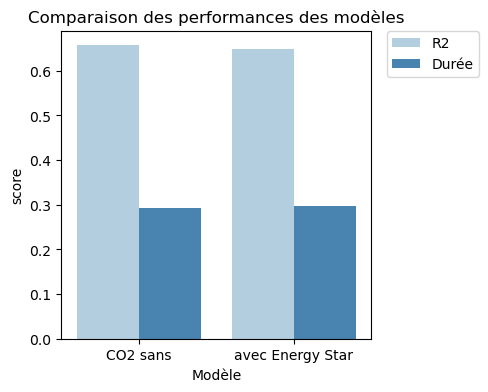

In [199]:

# Comparaison des performances des algorithmes sans et avec 'Energy Star Score'

eval_EnergyStar_score_melt1 = pd.melt(eval_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['R2', 'Durée'])

# Visualisation
plt.figure(figsize=(4,4))
sns.barplot(x=eval_EnergyStar_score_melt1['Modèle'],
            y=eval_EnergyStar_score_melt1['score'], hue=eval_EnergyStar_score_melt1['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()


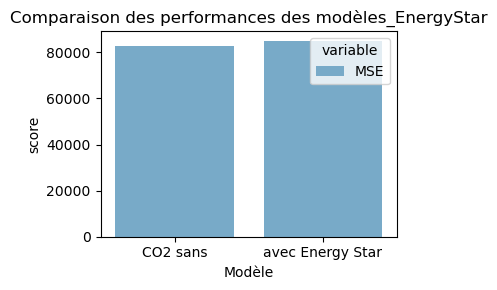

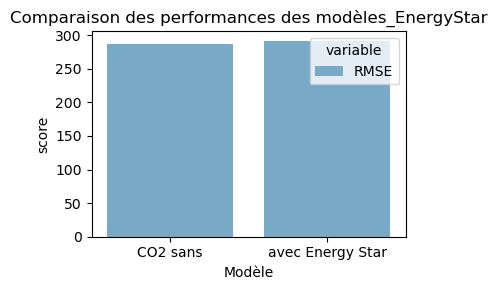

In [200]:

# Comparaison des performances des algorithmes sans et avec 'Energy Star Score'

eval_EnergyStar_score_melt2 = pd.melt(eval_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['MSE'])
eval_EnergyStar_score_melt3 = pd.melt(eval_EnergyStar, id_vars=['Modèle'], value_name='score', value_vars=['RMSE'])

# Visualisation
plt.figure(figsize=(4,3))
sns.barplot(x=eval_EnergyStar_score_melt2['Modèle'],
            y=eval_EnergyStar_score_melt2['score'], hue=eval_EnergyStar_score_melt2['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(4,3))
sns.barplot(x=eval_EnergyStar_score_melt3['Modèle'],
            y=eval_EnergyStar_score_melt3['score'], hue=eval_EnergyStar_score_melt3['variable'], palette='Blues')
plt.title('Comparaison des performances des modèles_EnergyStar', fontsize=12)
plt.tight_layout()  
plt.show()


Prendre en compte le score ‘Energy Star’ n’améliore pas les performances de l’algorithme de prédiction des émmisions de CO2.